In [1]:
import pandas as pd
import scipy as sc
import numpy as np
from scipy.stats import mode
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)


In [2]:
#Load Data
agency_df = pd.read_csv('AgencyData_Without2015.csv')

# Data Exploration

## Univariate Analysis

In [8]:
agency_df.shape

(192347, 49)

In [15]:
agency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192347 entries, 0 to 192346
Data columns (total 49 columns):
AGENCY_ID                    192347 non-null int64
PRIMARY_AGENCY_ID            192347 non-null int64
PROD_ABBR                    192347 non-null object
PROD_LINE                    192347 non-null object
STATE_ABBR                   192347 non-null object
STAT_PROFILE_DATE_YEAR       192347 non-null int64
RETENTION_POLY_QTY           192347 non-null int64
POLY_INFORCE_QTY             192347 non-null int64
PREV_POLY_INFORCE_QTY        192347 non-null int64
NB_WRTN_PREM_AMT             192347 non-null float64
WRTN_PREM_AMT                192347 non-null float64
PREV_WRTN_PREM_AMT           192347 non-null float64
PRD_ERND_PREM_AMT            192347 non-null float64
PRD_INCRD_LOSSES_AMT         192347 non-null float64
MONTHS                       192347 non-null int64
RETENTION_RATIO              192347 non-null float64
LOSS_RATIO                   192347 non-null float64
LOSS_

In [9]:
agency_df.describe()

,AGENCY_ID,PRIMARY_AGENCY_ID,STAT_PROFILE_DATE_YEAR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,...,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
count,192347.000000,192347.000000,192347.000000,192347.00000,192347.000000,192347.000000,192347.000000,1.923470e+05,1.923470e+05,1.923470e+05,...,192347.000000,192347.000000,192347.000000,192347.000000,192347.000000,192347.000000,192347.000000,192347.000000,192347.000000,192347.000000
mean,4978.213604,22600.895735,2009.667258,170.30721,188.527838,6833.655810,2372.716566,2.081519e+04,2.731501e+04,2.064040e+04,...,27454.629815,27495.623087,27458.233656,27565.119976,27489.765949,27616.812864,27454.552273,27460.027695,27453.774995,27453.928192
std,2930.136861,37040.566570,2.839440,752.36674,810.851902,24858.434348,10348.132792,6.927539e+04,7.280141e+04,6.921617e+04,...,44627.364166,44602.940289,44625.151893,44560.928091,44605.786161,44528.190010,44627.411745,44624.061688,44627.889541,44627.795329
min,3.000000,3.000000,2005.000000,0.00000,0.000000,0.000000,0.000000,-2.027776e+05,-1.192047e+05,-1.643490e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2364.000000,2805.000000,2007.000000,0.00000,0.000000,0.000000,0.000000,5.200000e+01,1.990000e+02,9.753000e+01,...,0.000000,0.000000,0.000000,0.000000,12.000000,66.000000,0.000000,0.000000,0.000000,0.000000
50%,4976.000000,6137.000000,2010.000000,0.00000,0.000000,0.000000,0.000000,1.276000e+03,1.975030e+03,1.291750e+03,...,0.000000,0.000000,0.000000,0.000000,52.000000,260.000000,0.000000,0.000000,0.000000,0.000000
75%,7589.000000,9360.000000,2012.000000,24.00000,36.000000,79.000000,542.870000,8.920620e+03,1.594701e+04,8.769655e+03,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
max,9998.000000,99999.000000,2014.000000,21979.00000,22968.000000,99999.000000,556930.220000,1.715742e+06,1.904570e+06,1.780498e+06,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000


In [3]:
#Checking Unique Values in each Features
agency_df.apply(lambda x: len(x.unique()))

AGENCY_ID                      1600
PRIMARY_AGENCY_ID               580
PROD_ABBR                        28
PROD_LINE                         2
STATE_ABBR                        6
STAT_PROFILE_DATE_YEAR           10
RETENTION_POLY_QTY             4934
POLY_INFORCE_QTY               5174
PREV_POLY_INFORCE_QTY          5307
NB_WRTN_PREM_AMT              34249
WRTN_PREM_AMT                109596
PREV_WRTN_PREM_AMT           107431
PRD_ERND_PREM_AMT            136362
PRD_INCRD_LOSSES_AMT          46262
MONTHS                           12
RETENTION_RATIO               20450
LOSS_RATIO                    49603
LOSS_RATIO_3YR                14485
GROWTH_RATE_3YR               11050
AGENCY_APPOINTMENT_YEAR          73
ACTIVE_PRODUCERS                 98
MAX_AGE                          61
MIN_AGE                          70
VENDOR_IND                        2
VENDOR                           10
PL_START_YEAR                    23
PL_END_YEAR                      10
COMMISIONS_START_YEAR       

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EB282E588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000027EB23F6470>], dtype=object)

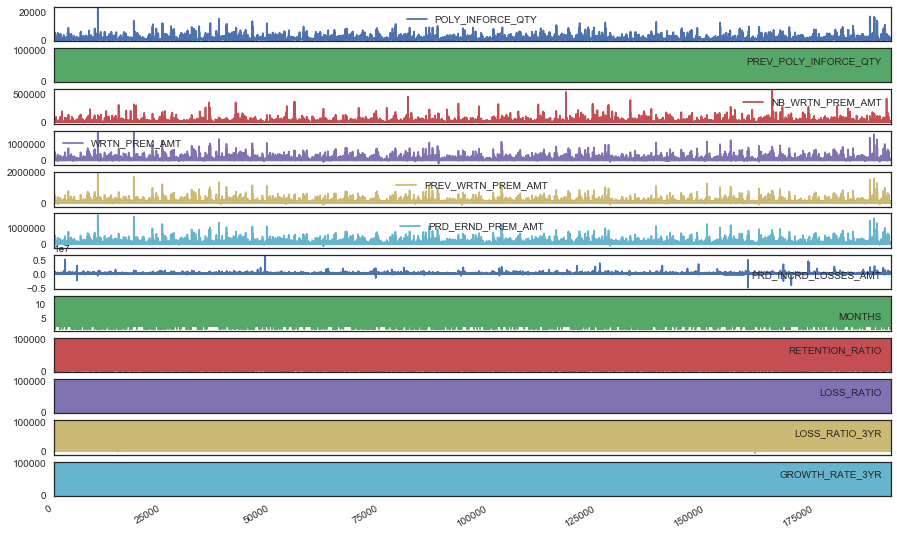

In [14]:
agency_df[agency_df.columns[7:19]].plot(subplots=True , figsize=(15,10) )

# Data Cleaning

In [17]:
#Checking Missing Value(99999) in each Feature Column
agency_df.apply(lambda x: sum(x == 99999))

AGENCY_ID                         0
PRIMARY_AGENCY_ID             35695
PROD_ABBR                         0
PROD_LINE                         0
STATE_ABBR                        0
STAT_PROFILE_DATE_YEAR            0
RETENTION_POLY_QTY                0
POLY_INFORCE_QTY                  0
PREV_POLY_INFORCE_QTY         12770
NB_WRTN_PREM_AMT                  1
WRTN_PREM_AMT                     0
PREV_WRTN_PREM_AMT            12770
PRD_ERND_PREM_AMT                 0
PRD_INCRD_LOSSES_AMT              0
MONTHS                            0
RETENTION_RATIO              117107
LOSS_RATIO                    42858
LOSS_RATIO_3YR                28136
GROWTH_RATE_3YR               70086
AGENCY_APPOINTMENT_YEAR        5098
ACTIVE_PRODUCERS               5098
MAX_AGE                        5098
MIN_AGE                        5098
VENDOR_IND                        0
VENDOR                            0
PL_START_YEAR                 75219
PL_END_YEAR                  188605
COMMISIONS_START_YEAR       

In [18]:
#Impute Missing value(99999) to Zero(0) and AGENCY_APPOINTMENT_YEAR to 2014.

def impute_missing_value(agency_df):
    agency_df.loc[agency_df['PREV_POLY_INFORCE_QTY']==99999,'PREV_POLY_INFORCE_QTY']= 0
    agency_df.loc[agency_df['PREV_WRTN_PREM_AMT']==99999,'PREV_WRTN_PREM_AMT']= 0

    agency_df.loc[agency_df['RETENTION_RATIO']==99999,'RETENTION_RATIO'] = 0.00

    # As  computed for each row in the data as RETENTION_POLY_QTY / PREV_POLY_INFORCE_QTY; 
    agency_df.loc[agency_df['LOSS_RATIO']==99999,'LOSS_RATIO'] = agency_df['PRD_INCRD_LOSSES_AMT'].divide(
        agency_df['WRTN_PREM_AMT'], fill_value=0.00)

    agency_df.loc[agency_df['LOSS_RATIO'].isnull(),'LOSS_RATIO']= 0.00

    agency_df.loc[agency_df['RETENTION_RATIO'].isnull(),'RETENTION_RATIO']= 0


    agency_df.loc[agency_df['LOSS_RATIO_3YR']==99999,'LOSS_RATIO_3YR'] = 0.00

    agency_df.loc[agency_df['GROWTH_RATE_3YR']==99999,'GROWTH_RATE_3YR'] = 0.00

    agency_df.loc[agency_df['AGENCY_APPOINTMENT_YEAR']==99999,'AGENCY_APPOINTMENT_YEAR'] = 2014

    agency_df['AGENCY_AGE_AZURE'] = 2014 - agency_df['AGENCY_APPOINTMENT_YEAR']
    
    return agency_df

In [19]:
# Imputing Missing Value 
agency_df = impute_missing_value(agency_df)

# Feature Engineering

In [20]:
#Feature Engineering. Created new Features from the data

def feature_engineering(agency_df):
    temp_mean = agency_df.pivot_table(values='MAX_AGE', index='STAT_PROFILE_DATE_YEAR' )
    miss_bool =  (agency_df['MAX_AGE']==99999)
    agency_df.loc[miss_bool,'MAX_AGE'] = agency_df.loc[miss_bool,'STAT_PROFILE_DATE_YEAR'].apply(lambda x: temp_mean[x])
    #agency_df[agency_df['MAX_AGE']==99999]['MAX_AGE'].count()

    temp_mean = agency_df.pivot_table(values='MIN_AGE', index='STAT_PROFILE_DATE_YEAR' )
    miss_bool =  (agency_df['MIN_AGE']==99999)
    agency_df.loc[miss_bool,'MIN_AGE'] = agency_df.loc[miss_bool,'STAT_PROFILE_DATE_YEAR'].apply(lambda x: temp_mean[x])
    #agency_df[agency_df['MIN_AGE']==99999]['MIN_AGE'].count()

    temp_mean = agency_df.pivot_table(values='ACTIVE_PRODUCERS', index='STAT_PROFILE_DATE_YEAR' )
    miss_bool =  (agency_df['ACTIVE_PRODUCERS']==99999)
    agency_df.loc[miss_bool,'ACTIVE_PRODUCERS'] = agency_df.loc[miss_bool,'STAT_PROFILE_DATE_YEAR'].apply(lambda x: temp_mean[x])
    #agency_df[agency_df['ACTIVE_PRODUCERS']==99999]['ACTIVE_PRODUCERS'].count()

    agency_df['PL_AGE'] = agency_df['PL_END_YEAR'] - agency_df['PL_START_YEAR']

    agency_df['CL_AGE'] = agency_df['CL_END_YEAR'] - agency_df['CL_START_YEAR']

    agency_df['ACTIVITY_NOTES_AGE'] = agency_df['ACTIVITY_NOTES_END_YEAR'] - agency_df['ACTIVITY_NOTES_START_YEAR']

    agency_df['COMMISIONS_AGE'] = agency_df['COMMISIONS_END_YEAR'] - agency_df['COMMISIONS_START_YEAR']

    agency_df['CL_DIFF_MDS'] = agency_df['CL_QUO_CT_MDS']-agency_df['CL_BOUND_CT_MDS']
    agency_df['CL_DIFF_SBZ'] = agency_df['CL_QUO_CT_SBZ']-agency_df['CL_BOUND_CT_SBZ']
    agency_df['CL_DIFF_eQT'] = agency_df['CL_QUO_CT_eQT']-agency_df['CL_BOUND_CT_eQT']
    agency_df['PL_DIFF_ELINKS'] = agency_df['PL_QUO_CT_ELINKS']-agency_df['PL_BOUND_CT_ELINKS']
    agency_df['PL_DIFF_PLRANK'] = agency_df['PL_QUO_CT_PLRANK']-agency_df['PL_BOUND_CT_PLRANK']
    agency_df['PL_DIFF_eQTte'] = agency_df['PL_QUO_CT_eQTte']-agency_df['PL_BOUND_CT_eQTte']
    agency_df['PL_DIFF_APPLIED'] = agency_df['PL_QUO_CT_APPLIED']-agency_df['PL_BOUND_CT_APPLIED']
    agency_df['PL_DIFF_TRANSACTNOW'] = agency_df['PL_QUO_CT_TRANSACTNOW']-agency_df['PL_BOUND_CT_TRANSACTNOW']

    agency_df['YEAR_MONTH']=((2014-agency_df['STAT_PROFILE_DATE_YEAR'])*12)+agency_df['MONTHS']
    
    return agency_df

In [21]:
#Appliying Feature Engineering 
agency_df = feature_engineering(agency_df) 

## Bivariate Analysis 

### Year wise analysis

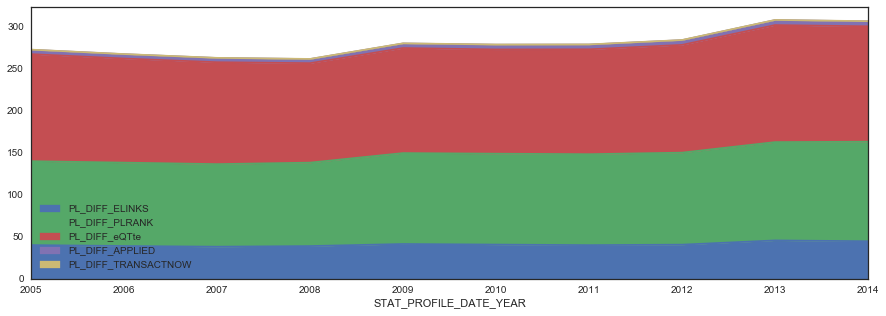

In [22]:
analysis_column = agency_df.columns[57:62]
grouped_Year_data = agency_df.groupby(['STAT_PROFILE_DATE_YEAR'])
grouped_Year_data[analysis_column].mean().plot.area(figsize=(15,5) , stacked=True)

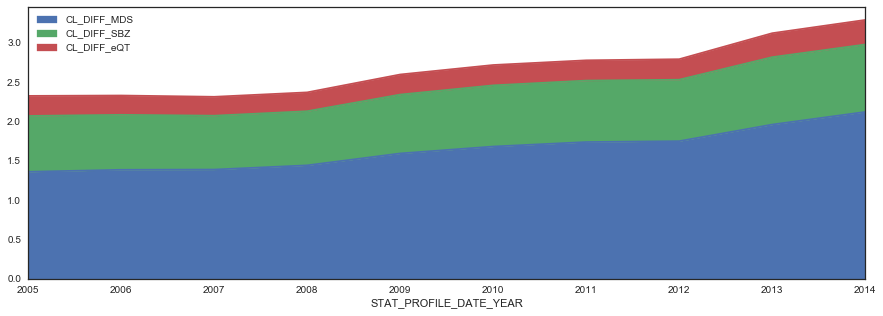

In [23]:
analysis_column = agency_df.columns[54:57]
grouped_Year_data = agency_df.groupby(['STAT_PROFILE_DATE_YEAR'])
grouped_Year_data[analysis_column].mean().plot.area(figsize=(15,5) , stacked=True)


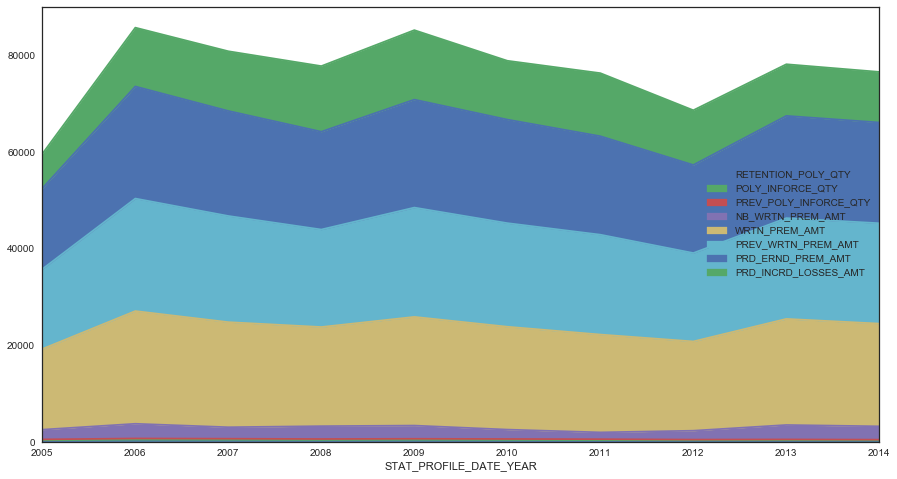

In [25]:
analysis_column = ['RETENTION_POLY_QTY' , 'POLY_INFORCE_QTY' , 'PREV_POLY_INFORCE_QTY' , 'NB_WRTN_PREM_AMT' , 'WRTN_PREM_AMT' , 'PREV_WRTN_PREM_AMT','PRD_ERND_PREM_AMT' ,
                   'PRD_INCRD_LOSSES_AMT']
grouped_Year_data = agency_df.groupby(['STAT_PROFILE_DATE_YEAR'])
grouped_Year_data[analysis_column].mean().plot.area(figsize=(15,8))

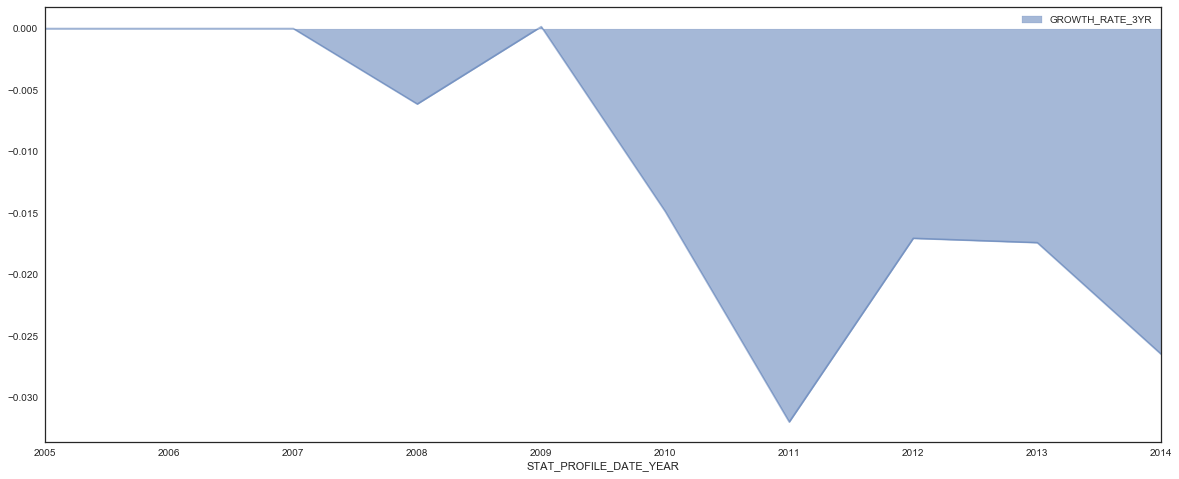

In [24]:
analysis_column = [ 'GROWTH_RATE_3YR']
grouped_Year_data = agency_df.groupby(['STAT_PROFILE_DATE_YEAR'])
grouped_Year_data[analysis_column].mean().plot.area(figsize=(20,8) , stacked=False )


### Month wise analysis

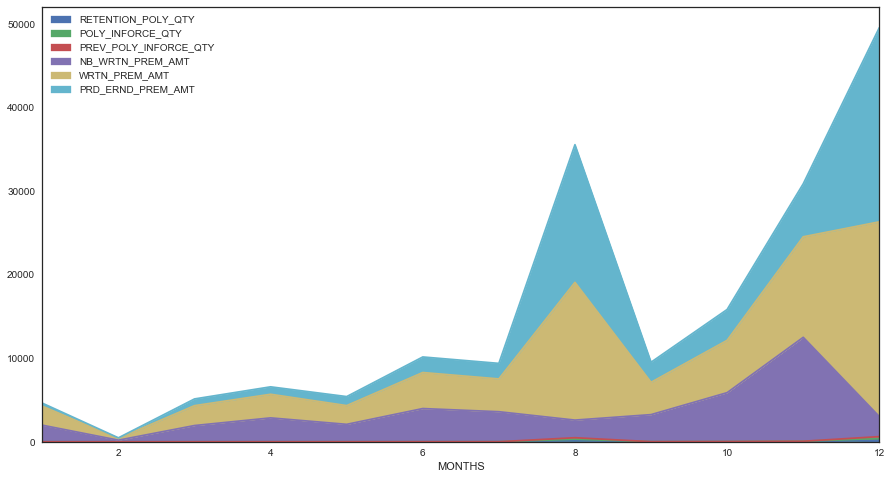

In [26]:
analysis_column = ['RETENTION_POLY_QTY' , 'POLY_INFORCE_QTY' , 'PREV_POLY_INFORCE_QTY' , 'NB_WRTN_PREM_AMT' , 'WRTN_PREM_AMT' ,'PRD_ERND_PREM_AMT'
                   ]
grouped_Year_data = agency_df.groupby(['MONTHS'])
grouped_Year_data[analysis_column].mean().plot.area(figsize=(15,8))

### Year and Month wise analysis

In [51]:
agency_df['YEAR_MONTH'].describe()

count    192347.000000
mean         62.954395
std          33.677146
min           1.000000
25%          36.000000
50%          60.000000
75%          96.000000
max         116.000000
Name: YEAR_MONTH, dtype: float64

In [27]:
agency_df['YEAR_MONTH']=((2014-agency_df['STAT_PROFILE_DATE_YEAR'])*12)+agency_df['MONTHS']

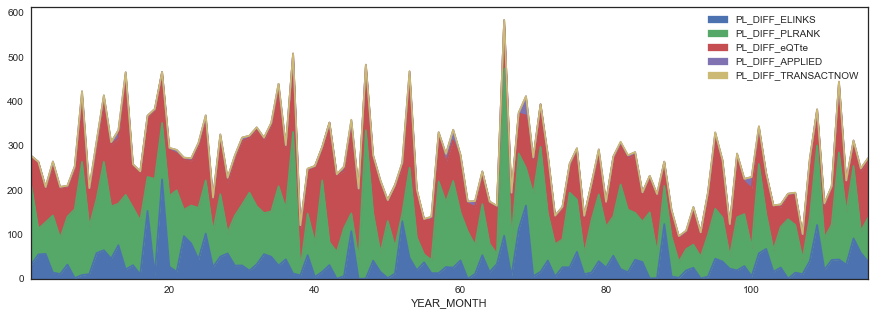

In [28]:
analysis_column = agency_df.columns[57:62]
grouped_Year_data = agency_df.groupby(['YEAR_MONTH'])
grouped_Year_data[analysis_column].mean().plot.area(figsize=(15,5) , stacked=True)

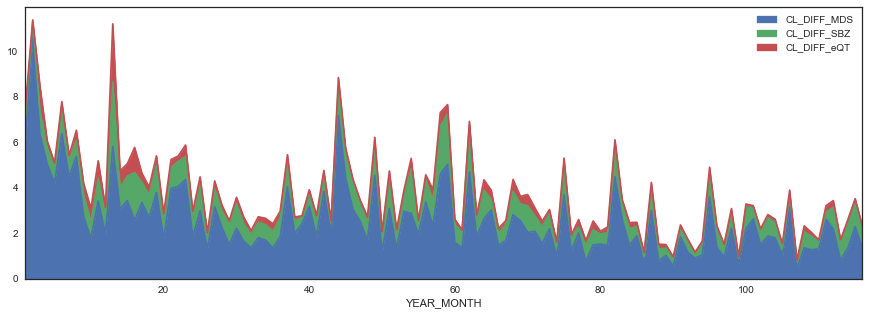

In [29]:
analysis_column = agency_df.columns[54:57]
grouped_Year_data = agency_df.groupby(['YEAR_MONTH'])
grouped_Year_data[analysis_column].mean().plot.area(figsize=(15,5) , stacked=True)


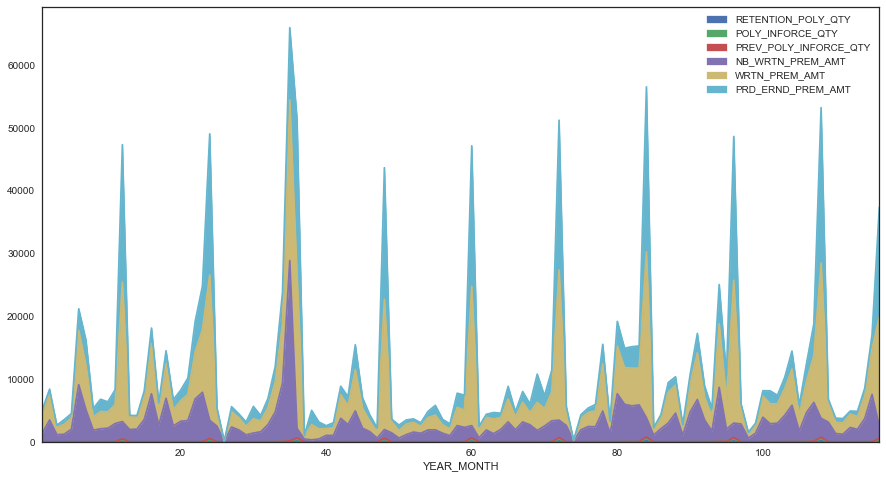

In [30]:
analysis_column = ['RETENTION_POLY_QTY' , 'POLY_INFORCE_QTY' , 'PREV_POLY_INFORCE_QTY' , 'NB_WRTN_PREM_AMT' , 'WRTN_PREM_AMT' , 'PRD_ERND_PREM_AMT'
                   ]
grouped_Year_data = agency_df.groupby(['YEAR_MONTH'])
grouped_Year_data[analysis_column].mean().plot.area(figsize=(15,8))

### Agent Age wise Analysis

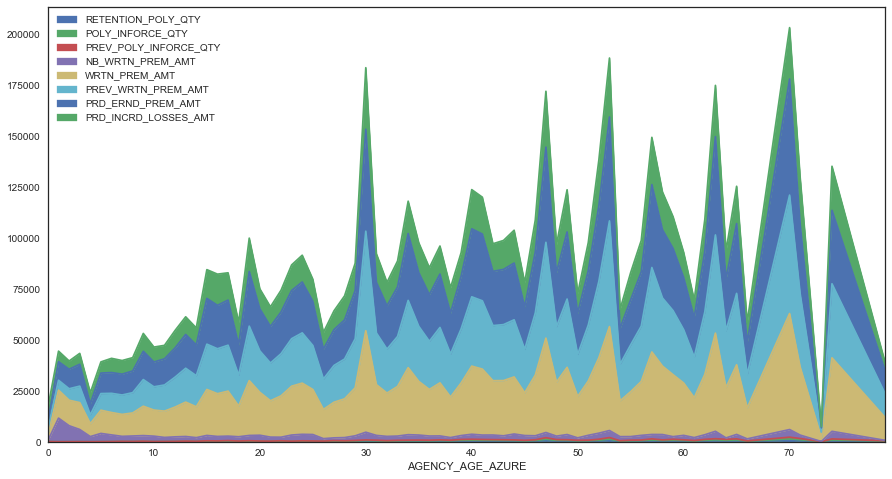

In [31]:
analysis_column = ['RETENTION_POLY_QTY' , 'POLY_INFORCE_QTY' , 'PREV_POLY_INFORCE_QTY' , 'NB_WRTN_PREM_AMT' , 'WRTN_PREM_AMT' , 'PREV_WRTN_PREM_AMT','PRD_ERND_PREM_AMT' ,
                   'PRD_INCRD_LOSSES_AMT']
grouped_Year_data = agency_df.groupby(['AGENCY_AGE_AZURE'])
grouped_Year_data[analysis_column].mean().plot.area(figsize=(15,8))

### Product Line wise analysis

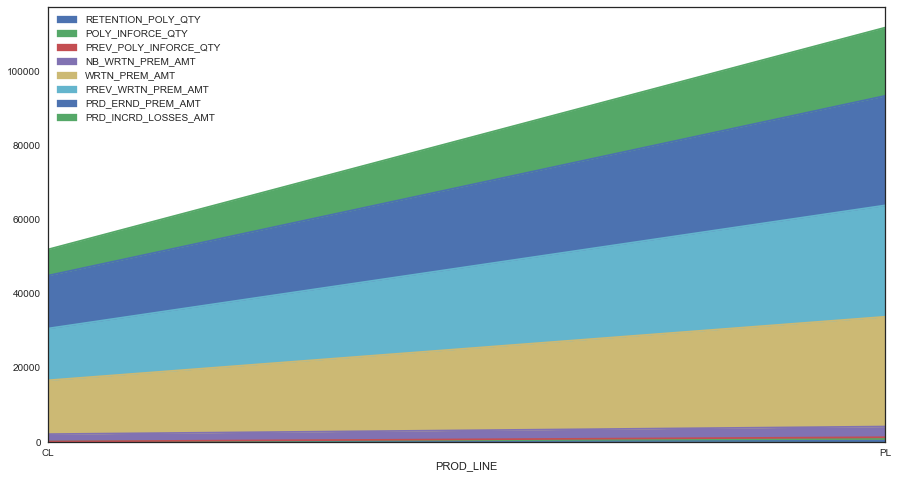

In [32]:
analysis_column = ['RETENTION_POLY_QTY' , 'POLY_INFORCE_QTY' , 'PREV_POLY_INFORCE_QTY' , 'NB_WRTN_PREM_AMT' , 'WRTN_PREM_AMT' , 'PREV_WRTN_PREM_AMT','PRD_ERND_PREM_AMT' ,
                   'PRD_INCRD_LOSSES_AMT']
grouped_Year_data = agency_df.groupby(['PROD_LINE'])
grouped_Year_data[analysis_column].mean().plot.area(figsize=(15,8))

###  State wise analysis

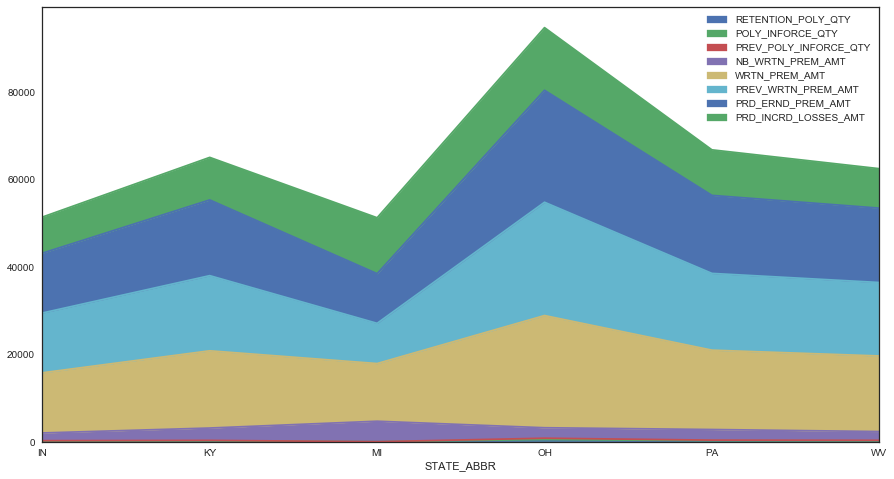

In [33]:
analysis_column = ['RETENTION_POLY_QTY' , 'POLY_INFORCE_QTY' , 'PREV_POLY_INFORCE_QTY' , 'NB_WRTN_PREM_AMT' , 'WRTN_PREM_AMT' , 'PREV_WRTN_PREM_AMT','PRD_ERND_PREM_AMT' ,
                   'PRD_INCRD_LOSSES_AMT']
grouped_Year_data = agency_df.groupby(['STATE_ABBR'])
grouped_Year_data[analysis_column].mean().plot.area(figsize=(15,8))

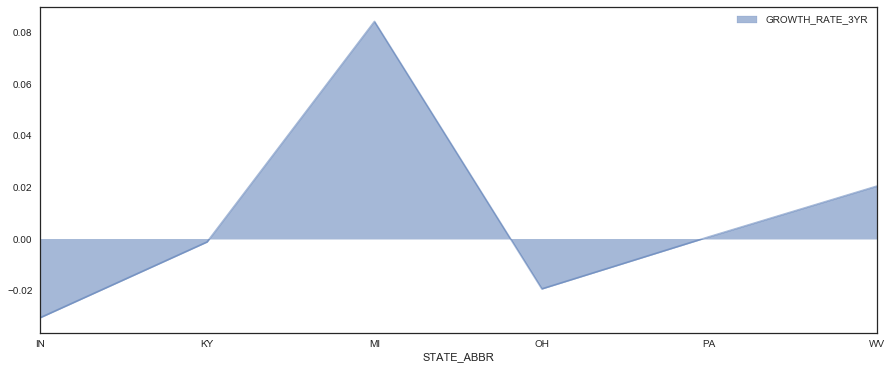

In [36]:
analysis_column = [ 'GROWTH_RATE_3YR' ]
grouped_Year_data = agency_df.groupby(['STATE_ABBR'])
grouped_Year_data[analysis_column].mean().plot.area(figsize=(15,6) , stacked=False )

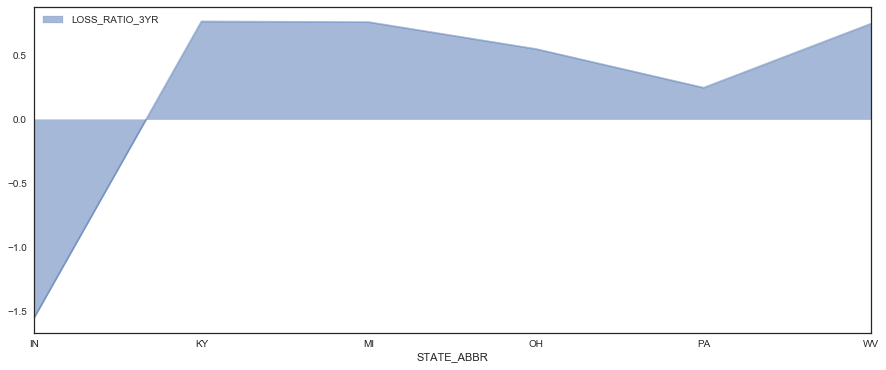

In [37]:
analysis_column = [ 'LOSS_RATIO_3YR' ]
grouped_Year_data = agency_df.groupby(['STATE_ABBR'])
grouped_Year_data[analysis_column].mean().plot.area(figsize=(15,6) , stacked=False )

### Product wise analysis

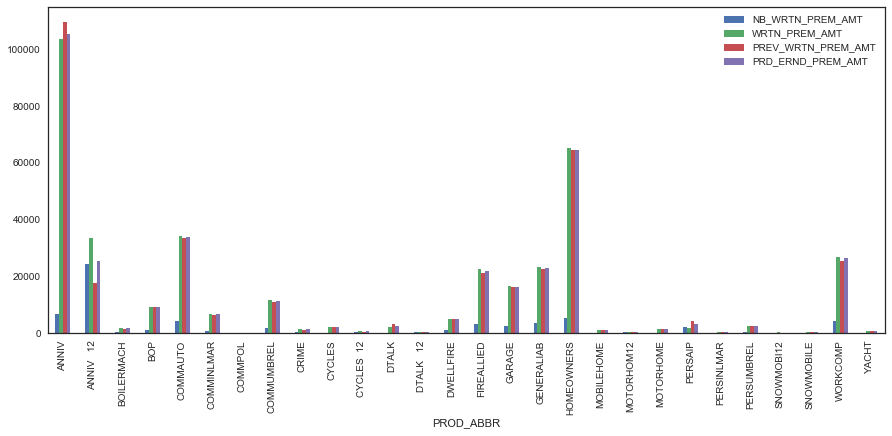

In [39]:
analysis_column = ['NB_WRTN_PREM_AMT' , 'WRTN_PREM_AMT' , 'PREV_WRTN_PREM_AMT','PRD_ERND_PREM_AMT']
grouped_Year_data = agency_df.groupby(['PROD_ABBR'])
grouped_Year_data[analysis_column].mean().plot.bar(figsize=(15,6) , stacked=False)

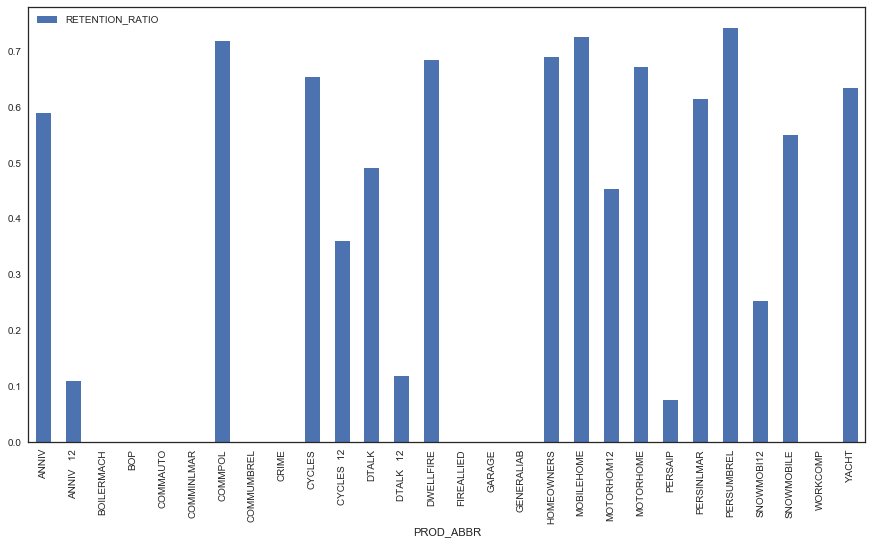

In [40]:
analysis_column = ['RETENTION_RATIO']
grouped_Year_data = agency_df.groupby(['PROD_ABBR'])
grouped_Year_data[analysis_column].mean().plot.bar(figsize=(15,8) , stacked=False)

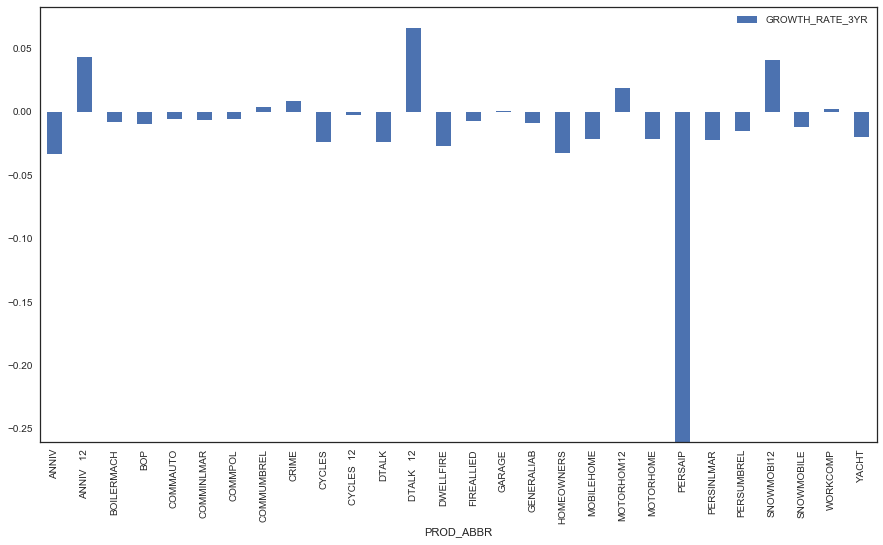

In [41]:
analysis_column = ['GROWTH_RATE_3YR']
grouped_Year_data = agency_df.groupby(['PROD_ABBR'])
grouped_Year_data[analysis_column].mean().plot.bar(figsize=(15,8) , stacked=False)

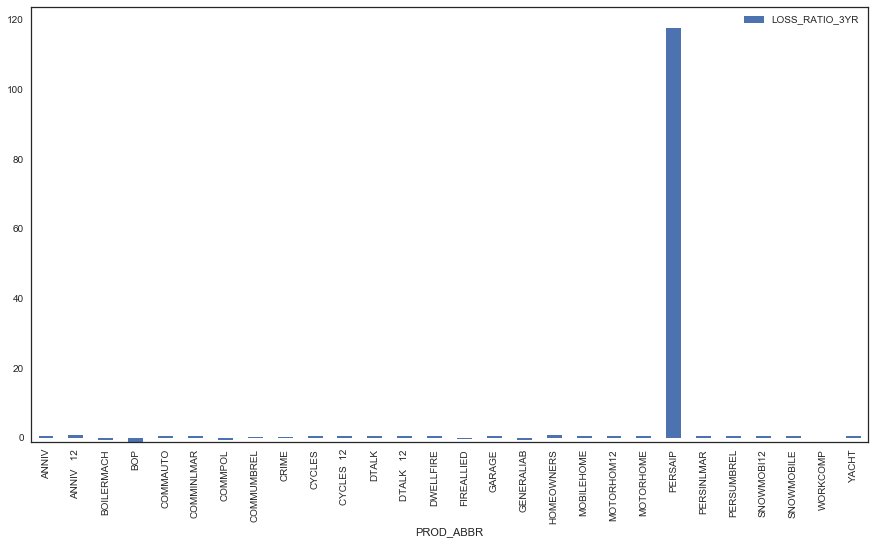

In [42]:
analysis_column = ['LOSS_RATIO_3YR']
grouped_Year_data = agency_df.groupby(['PROD_ABBR'])
grouped_Year_data[analysis_column].mean().plot.bar(figsize=(15,8) , stacked=False)

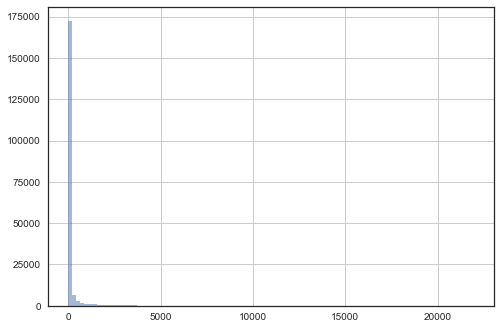

In [43]:
agency_df['RETENTION_POLY_QTY'].hist(bins=100 , alpha=0.5)

### Growth Rate Calculation Per Year from 2006 to 2014

In [111]:
for years in range(2006,2015):
    agency_df[str(years)+'_GROWTH_RATE']=agency_df[agency_df['STAT_PROFILE_DATE_YEAR']==years]['WRTN_PREM_AMT']-agency_df[agency_df['STAT_PROFILE_DATE_YEAR']==years]['PREV_WRTN_PREM_AMT']

In [120]:
for years in range(2006,2015):
    agency_df[str(years)+'_GROWTH_RATE'] = agency_df[str(years)+'_GROWTH_RATE'].dropna()

In [115]:
 for years in range(2006,2015):
    print(agency_df[str(years)+'_GROWTH_RATE'].describe())

count     17685.000000
mean         35.335628
std       14345.604403
min     -378439.450000
25%        -373.920000
50%           0.000000
75%         446.000000
max      402602.220000
Name: 2006_GROWTH_RATE, dtype: float64
count     18772.000000
mean       -230.940782
std       13749.856850
min     -475343.640000
25%        -293.360000
50%           0.000000
75%         345.190000
max      327077.750000
Name: 2007_GROWTH_RATE, dtype: float64
count     20228.000000
mean        334.792548
std       14358.146258
min     -349441.410000
25%        -256.942500
50%           0.000000
75%         289.052500
max      433690.450000
Name: 2008_GROWTH_RATE, dtype: float64
count     18343.000000
mean       -129.222192
std       13084.526520
min     -313516.590000
25%        -416.765000
50%           0.000000
75%         390.645000
max      440054.870000
Name: 2009_GROWTH_RATE, dtype: float64
count     19240.000000
mean       -159.210375
std       11462.921624
min     -237278.930000
25%        -359.

In [46]:
growth_year= []
for years in range(2006,2014):
       growth_year.append(str(years)+'_GROWTH_RATE')
                                         

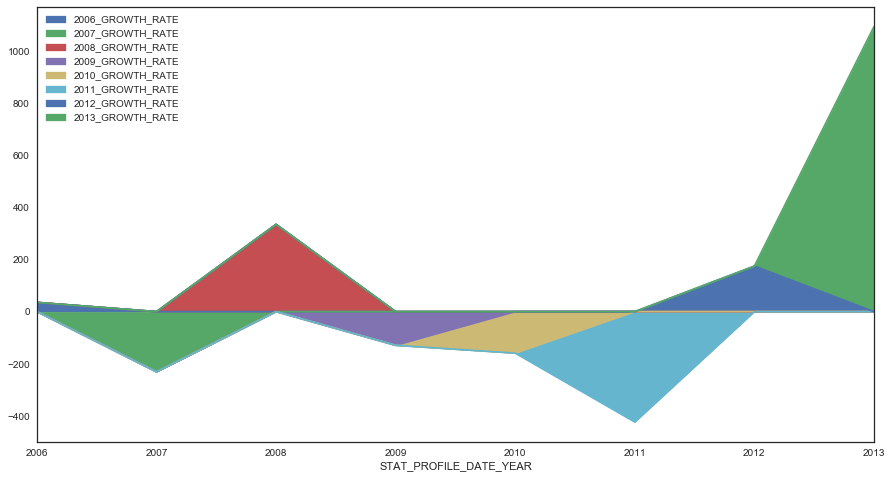

In [47]:
analysis_column = growth_year
grouped_Year_data = agency_df[(agency_df['STAT_PROFILE_DATE_YEAR']>=2006) & (agency_df['STAT_PROFILE_DATE_YEAR']<=2013)].groupby(['STAT_PROFILE_DATE_YEAR'])
grouped_Year_data[analysis_column].mean().plot.area(figsize=(15,8))

### Top 10 Agency and State wise distribution of Retention Ratio 

In [48]:
analysis_column = ['RETENTION_RATIO' ]
grouped_Year_data = agency_df.groupby(['AGENCY_ID' , 'STATE_ABBR'])
print(grouped_Year_data[analysis_column].count().sort_values('RETENTION_RATIO', ascending=False).head(10)  )

                      RETENTION_RATIO
AGENCY_ID STATE_ABBR                 
8636      IN                      226
3948      PA                      225
3676      OH                      223
2217      PA                      223
650       OH                      222
2105      IN                      222
6390      OH                      222
1850      OH                      221
4351      OH                      221
9725      OH                      221


### Agency wise analysis

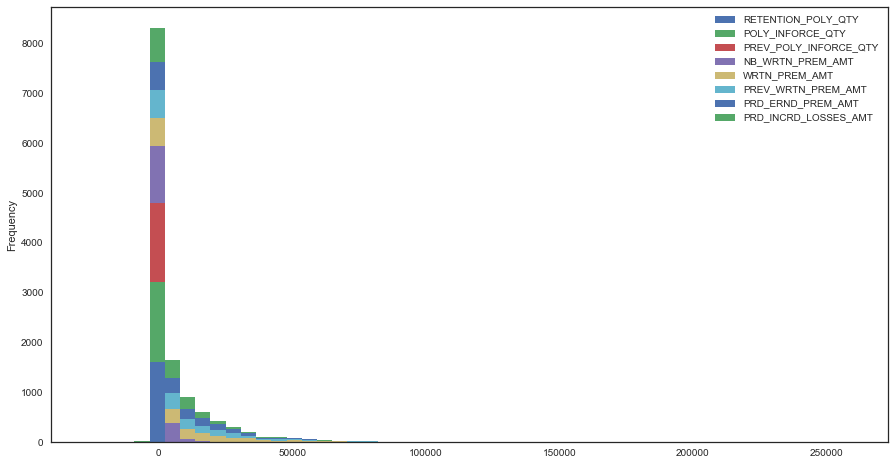

In [57]:
analysis_column =  ['RETENTION_POLY_QTY' , 'POLY_INFORCE_QTY' , 'PREV_POLY_INFORCE_QTY' , 'NB_WRTN_PREM_AMT' , 'WRTN_PREM_AMT' , 'PREV_WRTN_PREM_AMT','PRD_ERND_PREM_AMT' ,
                   'PRD_INCRD_LOSSES_AMT']
grouped_Year_data = agency_df.groupby(['AGENCY_ID'])
grouped_Year_data[analysis_column].mean().plot.hist(figsize=(15,8) , stacked=True , bins=50)

### Correlation analysis using Heat Map

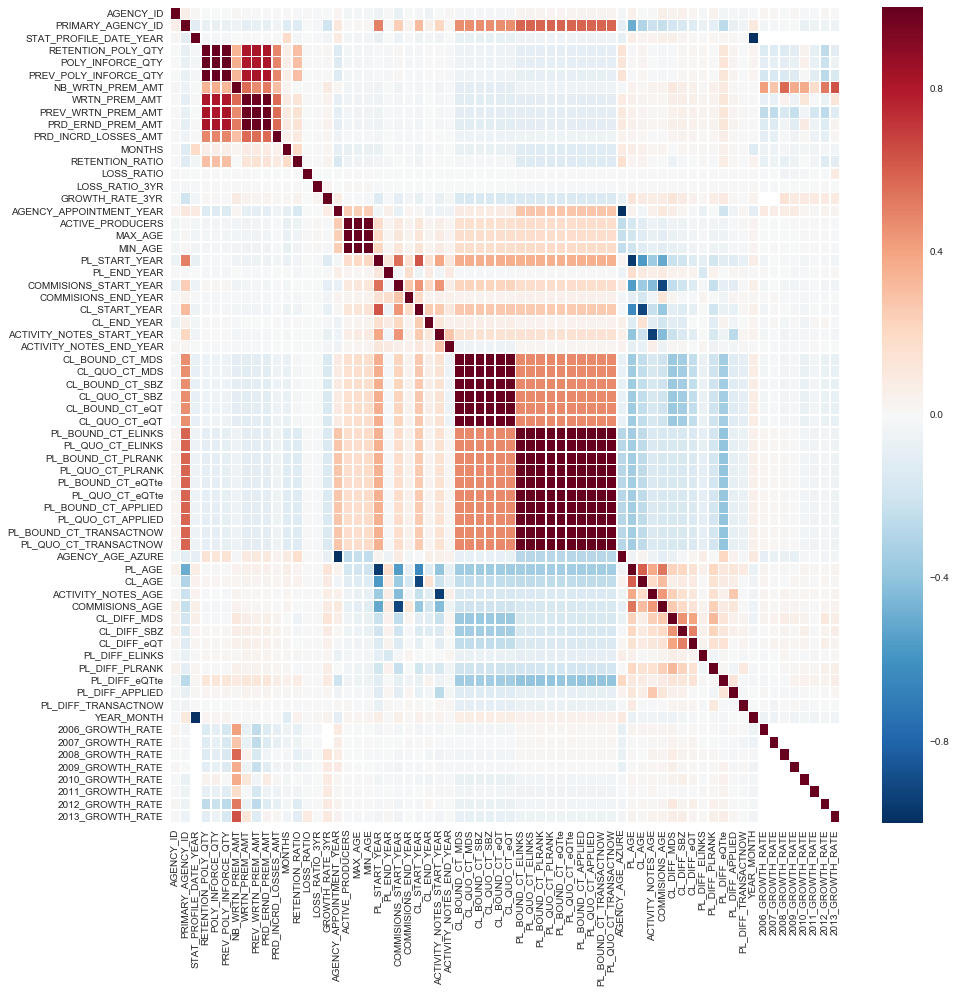

In [50]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(agency_df.corr(),linewidths=.5, ax=ax);

# Step-4:- Model Building

In [99]:
agency_df.shape

(192347, 71)

In [85]:
agency_df.columns

Index(['AGENCY_ID', 'PRIMARY_AGENCY_ID', 'PROD_ABBR', 'PROD_LINE',
       'STATE_ABBR', 'STAT_PROFILE_DATE_YEAR', 'RETENTION_POLY_QTY',
       'POLY_INFORCE_QTY', 'PREV_POLY_INFORCE_QTY', 'NB_WRTN_PREM_AMT',
       'WRTN_PREM_AMT', 'PREV_WRTN_PREM_AMT', 'PRD_ERND_PREM_AMT',
       'PRD_INCRD_LOSSES_AMT', 'MONTHS', 'RETENTION_RATIO', 'LOSS_RATIO',
       'LOSS_RATIO_3YR', 'GROWTH_RATE_3YR', 'AGENCY_APPOINTMENT_YEAR',
       'ACTIVE_PRODUCERS', 'MAX_AGE', 'MIN_AGE', 'VENDOR_IND', 'VENDOR',
       'PL_START_YEAR', 'PL_END_YEAR', 'COMMISIONS_START_YEAR',
       'COMMISIONS_END_YEAR', 'CL_START_YEAR', 'CL_END_YEAR',
       'ACTIVITY_NOTES_START_YEAR', 'ACTIVITY_NOTES_END_YEAR',
       'CL_BOUND_CT_MDS', 'CL_QUO_CT_MDS', 'CL_BOUND_CT_SBZ', 'CL_QUO_CT_SBZ',
       'CL_BOUND_CT_eQT', 'CL_QUO_CT_eQT', 'PL_BOUND_CT_ELINKS',
       'PL_QUO_CT_ELINKS', 'PL_BOUND_CT_PLRANK', 'PL_QUO_CT_PLRANK',
       'PL_BOUND_CT_eQTte', 'PL_QUO_CT_eQTte', 'PL_BOUND_CT_APPLIED',
       'PL_QUO_CT_APPLIED', 'PL_BOU

In [142]:
# Create Subset from the required column
drop_columns = agency_df.columns[25:49]
#drop_columns
sub_agency_df = agency_df.drop(drop_columns , axis=1 )
sub_agency_df.drop(['AGENCY_APPOINTMENT_YEAR' , 'PRIMARY_AGENCY_ID' , 'YEAR_MONTH'], axis=1 ,inplace=True)

In [122]:
sub_agency_df.columns

Index(['AGENCY_ID', 'PROD_ABBR', 'PROD_LINE', 'STATE_ABBR',
       'STAT_PROFILE_DATE_YEAR', 'RETENTION_POLY_QTY', 'POLY_INFORCE_QTY',
       'PREV_POLY_INFORCE_QTY', 'NB_WRTN_PREM_AMT', 'WRTN_PREM_AMT',
       'PREV_WRTN_PREM_AMT', 'PRD_ERND_PREM_AMT', 'PRD_INCRD_LOSSES_AMT',
       'MONTHS', 'RETENTION_RATIO', 'LOSS_RATIO', 'LOSS_RATIO_3YR',
       'GROWTH_RATE_3YR', 'ACTIVE_PRODUCERS', 'MAX_AGE', 'MIN_AGE',
       'VENDOR_IND', 'VENDOR', 'AGENCY_AGE_AZURE', 'PL_AGE', 'CL_AGE',
       'ACTIVITY_NOTES_AGE', 'COMMISIONS_AGE', 'CL_DIFF_MDS', 'CL_DIFF_SBZ',
       'CL_DIFF_eQT', 'PL_DIFF_ELINKS', 'PL_DIFF_PLRANK', 'PL_DIFF_eQTte',
       'PL_DIFF_APPLIED', 'PL_DIFF_TRANSACTNOW', '2006_GROWTH_RATE',
       '2007_GROWTH_RATE', '2008_GROWTH_RATE', '2009_GROWTH_RATE',
       '2010_GROWTH_RATE', '2011_GROWTH_RATE', '2012_GROWTH_RATE',
       '2013_GROWTH_RATE', '2014_GROWTH_RATE'],
      dtype='object')

In [134]:
sub_agency_df.shape

(192347, 45)

In [146]:
sub_agency_df.apply(lambda x: sum(x.isnull()))

AGENCY_ID                 0
PROD_ABBR                 0
PROD_LINE                 0
STATE_ABBR                0
STAT_PROFILE_DATE_YEAR    0
RETENTION_POLY_QTY        0
POLY_INFORCE_QTY          0
PREV_POLY_INFORCE_QTY     0
NB_WRTN_PREM_AMT          0
WRTN_PREM_AMT             0
PREV_WRTN_PREM_AMT        0
PRD_ERND_PREM_AMT         0
PRD_INCRD_LOSSES_AMT      0
MONTHS                    0
RETENTION_RATIO           0
LOSS_RATIO                0
LOSS_RATIO_3YR            0
GROWTH_RATE_3YR           0
ACTIVE_PRODUCERS          0
MAX_AGE                   0
MIN_AGE                   0
VENDOR_IND                0
VENDOR                    0
AGENCY_AGE_AZURE          0
PL_AGE                    0
CL_AGE                    0
ACTIVITY_NOTES_AGE        0
COMMISIONS_AGE            0
CL_DIFF_MDS               0
CL_DIFF_SBZ               0
CL_DIFF_eQT               0
PL_DIFF_ELINKS            0
PL_DIFF_PLRANK            0
PL_DIFF_eQTte             0
PL_DIFF_APPLIED           0
PL_DIFF_TRANSACTNOW 

In [145]:
sub_agency_df[sub_agency_df.columns[36:45]] = sub_agency_df[sub_agency_df.columns[36:45]].fillna(0.00)

### Create Dummy variable using one Hot Encoding for categorical features

In [62]:
from sklearn.preprocessing import LabelEncoder

def createDummy(df , var_mod):
    le = LabelEncoder()
    #var_mod = ['PROD_ABBR','STATE_ABBR' ]
    le = LabelEncoder()
    for i in var_mod:
        df[i] = le.fit_transform(df[i])

    #One Hot Coding:
    df = pd.get_dummies(df, columns=var_mod)
    return df

In [147]:
var_mod = ['PROD_ABBR','PROD_LINE','STATE_ABBR' , 'VENDOR_IND' , 'VENDOR']
sub_agency_df = createDummy(sub_agency_df,var_mod)
sub_agency_df.shape

(192347, 88)

In [137]:
sub_agency_df.columns

Index(['AGENCY_ID', 'STAT_PROFILE_DATE_YEAR', 'RETENTION_POLY_QTY',
       'POLY_INFORCE_QTY', 'PREV_POLY_INFORCE_QTY', 'NB_WRTN_PREM_AMT',
       'WRTN_PREM_AMT', 'PREV_WRTN_PREM_AMT', 'PRD_ERND_PREM_AMT',
       'PRD_INCRD_LOSSES_AMT', 'MONTHS', 'RETENTION_RATIO', 'LOSS_RATIO',
       'LOSS_RATIO_3YR', 'GROWTH_RATE_3YR', 'ACTIVE_PRODUCERS', 'MAX_AGE',
       'MIN_AGE', 'AGENCY_AGE_AZURE', 'PL_AGE', 'CL_AGE', 'ACTIVITY_NOTES_AGE',
       'COMMISIONS_AGE', 'CL_DIFF_MDS', 'CL_DIFF_SBZ', 'CL_DIFF_eQT',
       'PL_DIFF_ELINKS', 'PL_DIFF_PLRANK', 'PL_DIFF_eQTte', 'PL_DIFF_APPLIED',
       'PL_DIFF_TRANSACTNOW', '2006_GROWTH_RATE', '2007_GROWTH_RATE',
       '2008_GROWTH_RATE', '2009_GROWTH_RATE', '2010_GROWTH_RATE',
       '2011_GROWTH_RATE', '2012_GROWTH_RATE', '2013_GROWTH_RATE',
       '2014_GROWTH_RATE', 'PROD_ABBR_0', 'PROD_ABBR_1', 'PROD_ABBR_2',
       'PROD_ABBR_3', 'PROD_ABBR_4', 'PROD_ABBR_5', 'PROD_ABBR_6',
       'PROD_ABBR_7', 'PROD_ABBR_8', 'PROD_ABBR_9', 'PROD_ABBR_10',
    

### Dividing data into Train [2005 to 2012] and Test  [2013 and 2014] data set

In [148]:
test_agency_df = sub_agency_df[sub_agency_df['STAT_PROFILE_DATE_YEAR']>=2013]
train_agency_df = sub_agency_df[sub_agency_df['STAT_PROFILE_DATE_YEAR']<=2012]

In [149]:
test_agency_df.shape , train_agency_df.shape , agency_df.shape

((39926, 88), (152421, 88), (192347, 72))

### VIF calculation and removing correlated Features

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif_(X):
    print (X.shape)
    thresh = 5.0
    variables = list(range(X.shape[1]))
    dropped=True
    while (dropped==True):
        dropped=False
        print(variables)
        vif = [variance_inflation_factor(X[variables].values, ix) for ix in list(range(X[variables].shape[1]))]
        print('vif='+str(vif))
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[variables]
print (train_agency_df.shape)
df_without_multicollinearity=calculate_vif_(train_agency_df[train_agency_df.columns[6:31]])
print(df_without_multicollinearity.corr())

(152421, 87)
(152421, 25)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
vif=[186.10865330091809, 69.856892197910668, 337.37592670323784, 1.5335487251288222, 10.180200232676727, 1.6730739905699266, 1.0403159153388697, 1.0015098655971391, 1.0424401564328614, 401.66409944123336, 1299.2412226178869, 1014.532997007012, 4.575726838427693, 5.3467136970159217, 2.5114630180703008, 1.671105884225607, 2.2781212436186946, 1.885247016753884, 1.7207027233396297, 1.5146546558917175, 1.0460334684586072, 1.3215576668245506, 1.569180147597526, 1.1429247187845271, 1.2598808201806946]
dropping 'MAX_AGE' at index: 10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
vif=[186.01280338996708, 69.855902590429025, 337.28568238328529, 1.5335229467052676, 5.8243332064662505, 1.6703824132953515, 1.0403151625295928, 1.0013270069159366, 1.0420506922928174, 318.77273072341501, 322.6393540996757, 3.8544668362092938, 5.2425111734960019, 

### Cross Validation Grid Search for Model Best Parameter Fit

In [169]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.grid_search import GridSearchCV

def modelfitWithGridSearch(name , alg, dtrain, dvalidation , dtest, predictors, target, IDcol, tuned_parameters,rmse, cvNo):
    #Fit the algorithm on the data
    
    clf = GridSearchCV(alg, tuned_parameters, cv=cvNo, scoring='neg_mean_squared_error')
    
    clf.fit(dtrain[predictors], dtrain[target])
    
    print("Best parameters set found on development set:")
    print(clf.best_estimator_)
    
    print("Best Score"+str(clf.best_score_))
       
    #Predict training set:
    dtrain_predictions = clf.predict(dtrain[predictors])
    #print('predictors '+str(predictors))
        
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
  
   
    
    dvalidation_predictions = clf.predict(dvalidation[predictors])
    dvalidation.loc[:,'PRED_'+str(target)+'_'+str(name)] = dvalidation_predictions
    print ("\nValidation Model Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dvalidation[target].values, dvalidation_predictions)))
    
    print(len(rmse['ALG']))
    rmse.loc[len(rmse['ALG'])-1,'CVD_Best_Score'] =clf.best_score_
    rmse.loc[len(rmse['ALG'])-1,'Train_RMSE'] =np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    rmse.loc[len(rmse['ALG'])-1,'Test_RMSE']  =np.sqrt(metrics.mean_squared_error(dvalidation[target].values, dvalidation_predictions))
    
    
    #dvalidation[[target,'PRED_'+str(target)]].plot.area(figsize=(10,6) , stacked=False )
    
    if dtest != None:
        if dtest.empty==False:
            dtest_predictions = clf.predict(dtest[predictors])
            dtest.loc[:,target] = dtest_predictions

### Regression Alogorithms and Model Performance comparison

In [192]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


def ridge(train_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =['MAX_AGE' , 'PRD_ERND_PREM_AMT' ,'MIN_AGE' ,'WRTN_PREM_AMT' ,'MONTHS'  'NB_WRTN_PREM_AMT' ,'POLY_INFORCE_QTY' ]
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]
    param_grid = {
                  "alpha": [1e-20, 1e-15, 1e-10,1e-5, 0.0001 , 0.001 , 0.01  , 0.1]

                  }

    alg2 = Ridge(alpha=0.001, normalize=True ,  fit_intercept=True, max_iter=100)
    modelfitWithGridSearch("ridge",alg2, train_agency_df, test_agency_df , None, predictors, target, IDcol, param_grid,rmse,cvNo)
    


def lasso(train_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =['MA_AGE' , 'PRD_ERND_PREM_AMT' ,'MIN_AGE' ,'WRTN_PREM_AMT' ,'MONTHS' ,'NB_WRTN_PREM_AMT' ,'POLY_INFORCE_QTY'  ]
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]
    param_grid = {
                  "alpha": [1e-2,  1, 5, 10 , 20]

                  }

    alg2 = Lasso(normalize=True ,  fit_intercept=True )
    modelfitWithGridSearch("lasso",alg2, train_agency_df, test_agency_df , None, predictors, target, IDcol, param_grid,rmse,cvNo)  
    
def decisionTreeRegressor(train_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =['NB_WRTN_PREM_AMT','POLY_INFORCE_QTY']
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]

    param_grid = {"criterion": ["mse"],
                  "min_samples_split": [10 , 20  ],
                  #"max_depth": [ 10 ,20 , 30],
                  "min_samples_leaf": [5, 10 ]
                  }

    alg3 = DecisionTreeRegressor()
    modelfitWithGridSearch("DecisionTree",alg3, train_agency_df, test_agency_df , None, predictors, target, IDcol, param_grid,rmse,cvNo)    
    
def randomForestRegressor(train_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =['NB_WRTN_PREM_AMT','POLY_INFORCE_QTY']
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]

    param_grid = {"criterion": ["mse"],
                  #"min_samples_split": [1000],
                  #"min_samples_leaf": [5 ]
                  }

    alg3 = RandomForestRegressor()
    modelfitWithGridSearch("RandomForest",alg3, train_agency_df, test_agency_df , None, predictors, target, IDcol,param_grid,rmse,cvNo)   

def gradientBoostingRegressor(train_agency_df, test_agency_df,target,IDcol,rmse,cvNo):
    removeColumn =['NB_WRTN_PREM_AMT','POLY_INFORCE_QTY' ]
    predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]

    param_grid = { 
                  #"min_samples_split": [1000],
                  
                 # 'min_samples_leaf': [5]
                  }

    alg3 = GradientBoostingRegressor()
    modelfitWithGridSearch("GBM",alg3, train_agency_df, test_agency_df , None, predictors, target, IDcol,param_grid,rmse,cvNo)

In [179]:
rmse_data = {'ALG':[] , 'CVD_Best_Score':[] , 'Train_RMSE':[] ,'Test_RMSE':[] }
rmse = pd.DataFrame(rmse_data)
index = 0
 

In [182]:
def best_fit_model_regression(train_agency_df, test_agency_df , target, IDcol,cvNo,index):

    rmse_data = {'ALG':[] , 'CVD_Best_Score':[] , 'Train_RMSE':[] ,'Test_RMSE':[] }
    rmse = pd.DataFrame(rmse_data)
    #rmse = pd.DataFrame({'A' : []})
    rmse.loc[index,'ALG']='Ridge'
    print("------------ Algorithm :- [Ridge Regression]----------------------------------")
    ridge(train_agency_df, test_agency_df , target, IDcol,rmse,cvNo)
    print("------------ Algorithm :- [Lasso Regression]----------------------------------")
    index= index +1;
    rmse.loc[index,'ALG']='Lasso'
    lasso(train_agency_df, test_agency_df , target, IDcol,rmse,cvNo)
    print("------------ Algorithm :- [Decision Tree Regression]----------------------------------")
    index= index +1;
    rmse.loc[index,'ALG']='Decision Tree'
    decisionTreeRegressor(train_agency_df, test_agency_df , target, IDcol,rmse,cvNo)
    print("------------ Algorithm :- [Random Forest Regression]----------------------------------")
    #print("-!!!!!--Best RMSE--!!!!--"+rmse.sort_values('Test_RMSE').head(1))

    return rmse   


In [188]:
def best_fit_model_ensemble_regression(train_agency_df, test_agency_df , target, IDcol,cvNo,index):
    index= index +1;
    rmse.loc[index,'ALG']='Random Forest'
    randomForestRegressor(train_agency_df, test_agency_df , target, IDcol,rmse,cvNo)
    print("------------ Algorithm :- [Gradient Boosting Regression]----------------------------------")
    index= index +1;
    rmse.loc[index,'ALG']='Gradient Boosting'
    gradientBoostingRegressor(train_agency_df, test_agency_df , target, IDcol,rmse,cvNo)

    #print("-!!!!!--Best RMSE--!!!!--"+rmse.sort_values('Test_RMSE').head(1))

    return rmse   

### Executing Different Model for POLY_INFORCE_QTY

In [195]:
target = 'POLY_INFORCE_QTY'
IDcol = ['AGENCY_ID']
index=0
rmse  = best_fit_model_regression(train_agency_df, test_agency_df, target, IDcol, 10,index)


------------ Algorithm :- [Ridge Regression]----------------------------------
Best parameters set found on development set:
Ridge(alpha=1e-20, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=True, random_state=None, solver='auto', tol=0.001)
Best Score-3470.2953992121206

Model Report
RMSE : 58.31


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 2.029e+10
1
------------ Algorithm :- [Lasso Regression]----------------------------------
Best parameters set found on development set:
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Best Score-3907.565067700718

Model Report
RMSE : 62.23


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 74.94
2
------------ Algorithm :- [Decision Tree Regression]----------------------------------
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-4357.905807907704

Model Report
RMSE : 35.15

Validation Model Report
RMSE : 76.5
3
------------ Algorithm :- [Random Forest Regression]----------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [184]:
rmse

,ALG,CVD_Best_Score,Test_RMSE,Train_RMSE
0,Ridge,-3470.295399,2.029424e+10,58.314324
1,Lasso,-3907.565068,7.493523e+01,62.230923
2,Decision Tree,-4494.454001,7.770715e+01,41.218891


In [197]:
target = 'POLY_INFORCE_QTY'
IDcol = ['AGENCY_ID']
index=2
rmse  = best_fit_model_ensemble_regression(train_agency_df, test_agency_df, target, IDcol, 10,index)

Best parameters set found on development set:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Best Score-3345.26883940349

Model Report
RMSE : 21.62


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 63.03
4
------------ Algorithm :- [Gradient Boosting Regression]----------------------------------
Best parameters set found on development set:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Best Score-3262.012171913208

Model Report
RMSE : 43.38

Validation Model Report
RMSE : 68.83
5


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [198]:
rmse

,ALG,CVD_Best_Score,Test_RMSE,Train_RMSE
0,Ridge,-3470.295399,2.029424e+10,58.314324
1,Lasso,-3907.565068,7.493523e+01,62.230923
2,Decision Tree,-4357.905808,7.649958e+01,35.150418
3,Random Forest,-3345.268839,6.302851e+01,21.617123
4,Gradient Boosting,-3262.012172,6.883032e+01,43.381796


### Executing Different Model for NB_WRTN_PREM_AMT

In [199]:
rmse = pd.DataFrame(rmse_data)
index = 0

In [200]:
target = 'NB_WRTN_PREM_AMT'
IDcol = ['AGENCY_ID']
index=0
rmse  = best_fit_model_regression(train_agency_df, test_agency_df, target, IDcol, 10,index)

------------ Algorithm :- [Ridge Regression]----------------------------------
Best parameters set found on development set:
Ridge(alpha=1e-20, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=True, random_state=None, solver='auto', tol=0.001)
Best Score-33813148.13212977

Model Report
RMSE : 5745


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 1.254e+13
1
------------ Algorithm :- [Lasso Regression]----------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increa

Best parameters set found on development set:
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Best Score-33832022.3965429

Model Report
RMSE : 5747


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 8.813e+12
2
------------ Algorithm :- [Decision Tree Regression]----------------------------------
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=20,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-34103365.76640326

Model Report
RMSE : 4090


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)



Validation Model Report
RMSE : 1.049e+04
3
------------ Algorithm :- [Random Forest Regression]----------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [201]:
target = 'NB_WRTN_PREM_AMT'
IDcol = ['AGENCY_ID']
index=2
rmse  = best_fit_model_ensemble_regression(train_agency_df, test_agency_df, target, IDcol, 10,index)

Best parameters set found on development set:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Best Score-26268970.603319556

Model Report
RMSE : 1982


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 9623
4
------------ Algorithm :- [Gradient Boosting Regression]----------------------------------
Best parameters set found on development set:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
Best Score-26052958.714080542

Model Report
RMSE : 4094

Validation Model Report
RMSE : 9912
5


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [202]:
rmse

,ALG,CVD_Best_Score,Test_RMSE,Train_RMSE
0,Ridge,-3.381315e+07,1.254313e+13,5745.015535
1,Lasso,-3.383202e+07,8.812639e+12,5746.593752
2,Decision Tree,-3.410337e+07,1.049270e+04,4089.857508
3,Random Forest,-2.626897e+07,9.622978e+03,1982.201626
4,Gradient Boosting,-2.605296e+07,9.911758e+03,4094.212931


In [ ]:
#test_agency_df[['NB_WRTN_PREM_AMT','NB_WRTN_PREM_AMT']].plot.area(figsize=(15,6) , stacked=False )

# Prediction for 2015

### Creating Feature Data for 2015 using Decision Tree Regression Model

In [203]:
rmse = pd.DataFrame(rmse_data)
index = 0

In [223]:
# Create Subset from the required column
drop_columns = agency_df.columns[25:49]
#drop_columns
sub_2015_agency_df = agency_df.drop(drop_columns , axis=1 )
sub_2015_agency_df.drop(['AGENCY_APPOINTMENT_YEAR' , 'PRIMARY_AGENCY_ID' , 'YEAR_MONTH'], axis=1 ,inplace=True)

In [232]:
sub_2015_agency_df.shape

(192347, 45)

In [237]:
col_add  = sub_2015_agency_df.columns[5:45]
#col_add = col_add.drop(['POLY_INFORCE_QTY' , 'NB_WRTN_PREM_AMT'] )
for col in col_add:
    print(col)

RETENTION_POLY_QTY
POLY_INFORCE_QTY
PREV_POLY_INFORCE_QTY
NB_WRTN_PREM_AMT
WRTN_PREM_AMT
PREV_WRTN_PREM_AMT
PRD_ERND_PREM_AMT
PRD_INCRD_LOSSES_AMT
MONTHS
RETENTION_RATIO
LOSS_RATIO
LOSS_RATIO_3YR
GROWTH_RATE_3YR
ACTIVE_PRODUCERS
MAX_AGE
MIN_AGE
VENDOR_IND
VENDOR
AGENCY_AGE_AZURE
PL_AGE
CL_AGE
ACTIVITY_NOTES_AGE
COMMISIONS_AGE
CL_DIFF_MDS
CL_DIFF_SBZ
CL_DIFF_eQT
PL_DIFF_ELINKS
PL_DIFF_PLRANK
PL_DIFF_eQTte
PL_DIFF_APPLIED
PL_DIFF_TRANSACTNOW
2006_GROWTH_RATE
2007_GROWTH_RATE
2008_GROWTH_RATE
2009_GROWTH_RATE
2010_GROWTH_RATE
2011_GROWTH_RATE
2012_GROWTH_RATE
2013_GROWTH_RATE
2014_GROWTH_RATE


In [217]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.grid_search import GridSearchCV

def modelfitWithPrediction(name , alg, dtrain, dvalidation , dtest, predictors, target, IDcol, tuned_parameters,rmse, cvNo):
    #Fit the algorithm on the data
    
    clf = GridSearchCV(alg, tuned_parameters, cv=cvNo, scoring='neg_mean_squared_error')
    
    clf.fit(dtrain[predictors], dtrain[target])
    
    print("Best parameters set found on development set:")
    print(clf.best_estimator_)
    
    print("Best Score"+str(clf.best_score_))
       
    #Predict training set:
    dtrain_predictions = clf.predict(dtrain[predictors])
    #print('predictors '+str(predictors))
        
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
  
   
    
    dvalidation_predictions = clf.predict(dvalidation[predictors])
    dvalidation.loc[:,'PRED_'+str(target)+'_'+str(name)] = dvalidation_predictions
    print ("\nValidation Model Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dvalidation[target].values, dvalidation_predictions)))
    
    print(len(rmse['ALG']))
    rmse.loc[len(rmse['ALG'])-1,'CVD_Best_Score'] =clf.best_score_
    rmse.loc[len(rmse['ALG'])-1,'Train_RMSE'] =np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions))
    rmse.loc[len(rmse['ALG'])-1,'Test_RMSE']  =np.sqrt(metrics.mean_squared_error(dvalidation[target].values, dvalidation_predictions))
    
    
    #dvalidation[[target,'PRED_'+str(target)]].plot.area(figsize=(10,6) , stacked=False )
    

    dtest_predictions = clf.predict(dtest[predictors])
    dtest.loc[:,target] = dtest_predictions

In [233]:
def create_2015_features(df):
    rmse_data = {'ALG':[] , 'CVD_Best_Score':[] , 'Train_RMSE':[] ,'Test_RMSE':[] }
    rmse = pd.DataFrame(rmse_data)
    index = 0
    data_2015_df = df[['AGENCY_ID', 'PROD_LINE','PROD_ABBR' , 'STATE_ABBR','VENDOR_IND' , 'VENDOR']].groupby(['AGENCY_ID', 'PROD_LINE','PROD_ABBR' , 'STATE_ABBR','VENDOR_IND' , 'VENDOR']).size().reset_index(name='COUNT')
    data_2015_df.drop(['COUNT'], axis=1 ,inplace=True)
    data_2015_df.loc[:,'STAT_PROFILE_DATE_YEAR'] = 2015
    var_mod = ['PROD_LINE', 'PROD_ABBR' , 'STATE_ABBR', 'VENDOR_IND' , 'VENDOR']
    data_2015_df = createDummy(data_2015_df,var_mod)
    
    col_add  = sub_2015_agency_df.columns[5:21].append(sub_2015_agency_df.columns[23:45])
    #col_add  = sub_2015_agency_df.columns[5:36]
    col_add = col_add.drop(['POLY_INFORCE_QTY' , 'NB_WRTN_PREM_AMT' ] )
    for col in col_add:
        print("Estimating Value for Column:>>>"+col)
        temp_df  =  df[['AGENCY_ID', 'PROD_LINE' , 'PROD_ABBR' , 'STATE_ABBR' ,'STAT_PROFILE_DATE_YEAR','VENDOR_IND' , 'VENDOR', col ]].groupby(['AGENCY_ID', 'PROD_LINE' ,'PROD_ABBR' , 'STATE_ABBR','STAT_PROFILE_DATE_YEAR','VENDOR_IND' , 'VENDOR' ]).mean().reset_index()
      
        temp_df = createDummy(temp_df,var_mod)
        
        test_temp_df  = temp_df[temp_df['STAT_PROFILE_DATE_YEAR']>=2013]
        train_temp_df = temp_df[temp_df['STAT_PROFILE_DATE_YEAR']<=2012]
        index= index +1;
        rmse.loc[index,'ALG']='DecisionTreeRegressor'
        
        target = col
        IDcol = ['AGENCY_ID']

        removeColumn =[]
        predictors = [x for x in train_temp_df.columns if x not in [target]+IDcol+removeColumn]
        param_grid = {"criterion": ["mse"],
                      "min_samples_split": [10   ],
                      #"max_depth": [ 10 ,20 , 30],
                      "min_samples_leaf": [5 ]
                      }


        #alg2 = Lasso(normalize=True ,  fit_intercept=True , max_iter=100)
        #modelfitWithGridSearch(alg2, train_temp_df, test_temp_df , data_2015_df, predictors, target, IDcol, param_grid,rmse) 
        
        alg3 = DecisionTreeRegressor()
        modelfitWithPrediction("DecisionTree",alg3, train_temp_df, test_temp_df , data_2015_df, predictors, target, IDcol, param_grid,rmse,10)    
 

    
    return data_2015_df
    


In [212]:
sub_2015_agency_df.shape

(192347, 45)

In [213]:
sub_2015_agency_df.columns

Index(['AGENCY_ID', 'PROD_ABBR', 'PROD_LINE', 'STATE_ABBR',
       'STAT_PROFILE_DATE_YEAR', 'RETENTION_POLY_QTY', 'POLY_INFORCE_QTY',
       'PREV_POLY_INFORCE_QTY', 'NB_WRTN_PREM_AMT', 'WRTN_PREM_AMT',
       'PREV_WRTN_PREM_AMT', 'PRD_ERND_PREM_AMT', 'PRD_INCRD_LOSSES_AMT',
       'MONTHS', 'RETENTION_RATIO', 'LOSS_RATIO', 'LOSS_RATIO_3YR',
       'GROWTH_RATE_3YR', 'ACTIVE_PRODUCERS', 'MAX_AGE', 'MIN_AGE',
       'VENDOR_IND', 'VENDOR', 'AGENCY_AGE_AZURE', 'PL_AGE', 'CL_AGE',
       'ACTIVITY_NOTES_AGE', 'COMMISIONS_AGE', 'CL_DIFF_MDS', 'CL_DIFF_SBZ',
       'CL_DIFF_eQT', 'PL_DIFF_ELINKS', 'PL_DIFF_PLRANK', 'PL_DIFF_eQTte',
       'PL_DIFF_APPLIED', 'PL_DIFF_TRANSACTNOW', '2006_GROWTH_RATE',
       '2007_GROWTH_RATE', '2008_GROWTH_RATE', '2009_GROWTH_RATE',
       '2010_GROWTH_RATE', '2011_GROWTH_RATE', '2012_GROWTH_RATE',
       '2013_GROWTH_RATE', '2014_GROWTH_RATE'],
      dtype='object')

In [234]:
agency_2015_df =   create_2015_features(sub_2015_agency_df)

Estimating Value for Column:>>>RETENTION_POLY_QTY
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-427202.07236729877

Model Report
RMSE : 641.2


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 523.3
1
Estimating Value for Column:>>>PREV_POLY_INFORCE_QTY
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-525801.310971739

Model Report
RMSE : 711


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 596.4
3
Estimating Value for Column:>>>WRTN_PREM_AMT
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-3748694016.6586494

Model Report
RMSE : 5.975e+04


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 5.935e+04
4
Estimating Value for Column:>>>PREV_WRTN_PREM_AMT
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-3850763399.25266

Model Report
RMSE : 6.064e+04


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 5.897e+04
5
Estimating Value for Column:>>>PRD_ERND_PREM_AMT
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-3748840753.6956816

Model Report
RMSE : 5.976e+04


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 5.828e+04
6
Estimating Value for Column:>>>PRD_INCRD_LOSSES_AMT
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-5043749477.089323

Model Report
RMSE : 6.875e+04


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 6.596e+04
7
Estimating Value for Column:>>>MONTHS
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-5.500816091391113

Model Report
RMSE : 2.261


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 2.641
8
Estimating Value for Column:>>>RETENTION_RATIO
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-0.06527482636223159

Model Report
RMSE : 0.2449


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 0.2687
9
Estimating Value for Column:>>>LOSS_RATIO
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-85991112.62998214

Model Report
RMSE : 9073


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 2.947e+15
10
Estimating Value for Column:>>>LOSS_RATIO_3YR
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-408.31472076727704

Model Report
RMSE : 19.48


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 92.03
11
Estimating Value for Column:>>>GROWTH_RATE_3YR
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-0.07711687032662227

Model Report
RMSE : 0.2678


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 0.321
12
Estimating Value for Column:>>>ACTIVE_PRODUCERS
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-191249.7937618336

Model Report
RMSE : 429.3


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 355.9
13
Estimating Value for Column:>>>MAX_AGE
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-189027.36681152182

Model Report
RMSE : 426.8


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 353.2
14
Estimating Value for Column:>>>MIN_AGE
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-188416.0929124837

Model Report
RMSE : 426.1


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 352.5
15
Estimating Value for Column:>>>AGENCY_AGE_AZURE
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-264.9720894096603

Model Report
RMSE : 15.61


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 16.1
16
Estimating Value for Column:>>>PL_AGE
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-198821816.65096483

Model Report
RMSE : 1.303e+04


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 1.457e+04
17
Estimating Value for Column:>>>CL_AGE
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-1359203452.0464008

Model Report
RMSE : 3.461e+04


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 3.707e+04
18
Estimating Value for Column:>>>ACTIVITY_NOTES_AGE
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-895994959.6673706

Model Report
RMSE : 2.864e+04


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 3.074e+04
19
Estimating Value for Column:>>>COMMISIONS_AGE
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-1370722160.4491675

Model Report
RMSE : 3.459e+04


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 3.724e+04
20
Estimating Value for Column:>>>CL_DIFF_MDS
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-15.223692026681107

Model Report
RMSE : 3.775


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 4.3
21
Estimating Value for Column:>>>CL_DIFF_SBZ
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-4.112744721159558

Model Report
RMSE : 1.896


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 2.002
22
Estimating Value for Column:>>>CL_DIFF_eQT
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-0.9896070583879095

Model Report
RMSE : 0.9494


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 1.087
23
Estimating Value for Column:>>>PL_DIFF_ELINKS
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-75481.66481766496

Model Report
RMSE : 244.8


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 261.4
24
Estimating Value for Column:>>>PL_DIFF_PLRANK
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-123735.05091883366

Model Report
RMSE : 333.9


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 352.3
25
Estimating Value for Column:>>>PL_DIFF_eQTte
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-38928.098084029145

Model Report
RMSE : 189.3


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 197.8
26
Estimating Value for Column:>>>PL_DIFF_APPLIED
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-1209.1641312955705

Model Report
RMSE : 34.22


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 35.91
27
Estimating Value for Column:>>>PL_DIFF_TRANSACTNOW
Best parameters set found on development set:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
Best Score-2.101260385020959

Model Report
RMSE : 1.402


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 1.451
28
Estimating Value for Column:>>>2006_GROWTH_RATE


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [236]:
agency_2015_df.columns

Index(['AGENCY_ID', 'STAT_PROFILE_DATE_YEAR', 'PROD_LINE_0', 'PROD_LINE_1',
       'PROD_ABBR_0', 'PROD_ABBR_1', 'PROD_ABBR_2', 'PROD_ABBR_3',
       'PROD_ABBR_4', 'PROD_ABBR_5', 'PROD_ABBR_6', 'PROD_ABBR_7',
       'PROD_ABBR_8', 'PROD_ABBR_9', 'PROD_ABBR_10', 'PROD_ABBR_11',
       'PROD_ABBR_12', 'PROD_ABBR_13', 'PROD_ABBR_14', 'PROD_ABBR_15',
       'PROD_ABBR_16', 'PROD_ABBR_17', 'PROD_ABBR_18', 'PROD_ABBR_19',
       'PROD_ABBR_20', 'PROD_ABBR_21', 'PROD_ABBR_22', 'PROD_ABBR_23',
       'PROD_ABBR_24', 'PROD_ABBR_25', 'PROD_ABBR_26', 'PROD_ABBR_27',
       'STATE_ABBR_0', 'STATE_ABBR_1', 'STATE_ABBR_2', 'STATE_ABBR_3',
       'STATE_ABBR_4', 'STATE_ABBR_5', 'VENDOR_IND_0', 'VENDOR_IND_1',
       'VENDOR_0', 'VENDOR_1', 'VENDOR_2', 'VENDOR_3', 'VENDOR_4', 'VENDOR_5',
       'VENDOR_6', 'VENDOR_7', 'VENDOR_8', 'VENDOR_9', 'RETENTION_POLY_QTY',
       'PREV_POLY_INFORCE_QTY', 'WRTN_PREM_AMT', 'PREV_WRTN_PREM_AMT',
       'PRD_ERND_PREM_AMT', 'PRD_INCRD_LOSSES_AMT', 'MONTHS',
      

In [ ]:
diff_column  = sub_agency_df.columns.drop(agency_2015_df.columns)

In [ ]:
diff_column

### Predicting  POLY_INFORCE_QTY  for 2015 using RandomForest Regression

In [229]:
agency_2015_df.shape

(26822, 77)

In [238]:
target = 'POLY_INFORCE_QTY'
IDcol = ['AGENCY_ID']
rmse_data = {'ALG':[] , 'CVD_Best_Score':[] , 'Train_RMSE':[] ,'Test_RMSE':[] }
rmse = pd.DataFrame(rmse_data)
removeColumn =['NB_WRTN_PREM_AMT','POLY_INFORCE_QTY','2006_GROWTH_RATE',
       '2007_GROWTH_RATE', '2008_GROWTH_RATE', '2009_GROWTH_RATE',
       '2010_GROWTH_RATE', '2011_GROWTH_RATE', '2012_GROWTH_RATE',
       '2013_GROWTH_RATE', '2014_GROWTH_RATE']
predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]

param_grid = {"criterion": ["mse"],
              #"min_samples_split": [1000],
              #"min_samples_leaf": [5 ]
              }

alg3 = RandomForestRegressor()
modelfitWithPrediction("RandomForest",alg3, train_agency_df, test_agency_df , agency_2015_df, predictors, target, IDcol,param_grid,rmse,10)   



Best parameters set found on development set:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Best Score-3406.073655163279

Model Report
RMSE : 22.1


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Validation Model Report
RMSE : 65.03
0


In [239]:
agency_2015_df['POLY_INFORCE_QTY'].describe()

count    26822.000000
mean       148.112240
std        377.801904
min          0.000000
25%          0.000000
50%          0.000000
75%         90.300000
max       2902.700000
Name: POLY_INFORCE_QTY, dtype: float64

### Predicting  NB_WRTN_PREM_AMT  for 2015 using RandomForest Regression

In [240]:
target = 'NB_WRTN_PREM_AMT'
IDcol = ['AGENCY_ID']
rmse_data = {'ALG':[] , 'CVD_Best_Score':[] , 'Train_RMSE':[] ,'Test_RMSE':[] }
rmse = pd.DataFrame(rmse_data)
removeColumn =['NB_WRTN_PREM_AMT','POLY_INFORCE_QTY','2006_GROWTH_RATE',
       '2007_GROWTH_RATE', '2008_GROWTH_RATE', '2009_GROWTH_RATE',
       '2010_GROWTH_RATE', '2011_GROWTH_RATE', '2012_GROWTH_RATE',
       '2013_GROWTH_RATE', '2014_GROWTH_RATE']
predictors = [x for x in train_agency_df.columns if x not in [target]+IDcol+removeColumn]

param_grid = {"criterion": ["mse"],
              #"min_samples_split": [1000],
              #"min_samples_leaf": [5 ]
              }

alg3 = RandomForestRegressor()
modelfitWithPrediction("RandomForest",alg3, train_agency_df, test_agency_df , agency_2015_df, predictors, target, IDcol,param_grid,rmse,10)   


Best parameters set found on development set:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Best Score-25436269.62092705

Model Report
RMSE : 2058

Validation Model Report
RMSE : 9475
0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [241]:
agency_2015_df['NB_WRTN_PREM_AMT'].describe()

count    26822.000000
mean      2031.135722
std       4621.495631
min          0.000000
25%         68.595250
50%        382.112000
75%       1922.600000
max      65298.119000
Name: NB_WRTN_PREM_AMT, dtype: float64

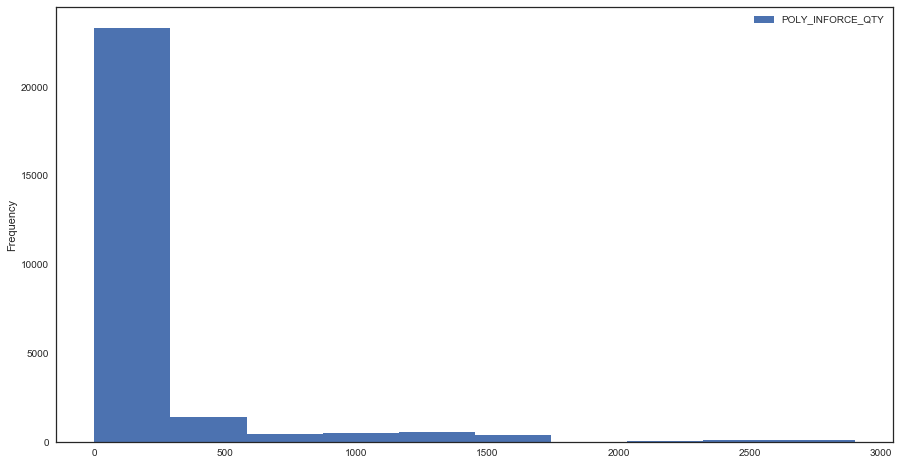

In [245]:
agency_2015_df[['POLY_INFORCE_QTY']].plot.hist(figsize=(15,8) , stacked=True)

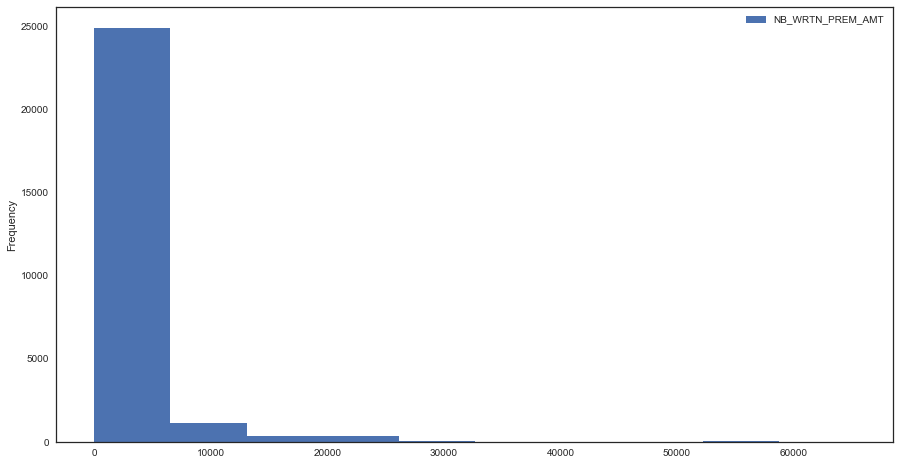

In [246]:
agency_2015_df[['NB_WRTN_PREM_AMT']].plot.hist(figsize=(15,8) , stacked=True)

In [247]:
analysis_column = ['GROWTH_RATE_3YR' ]
grouped_Year_data = agency_2015_df.groupby(['AGENCY_ID'])
print(grouped_Year_data[analysis_column].count().sort_values('GROWTH_RATE_3YR', ascending=False).head(5)  )

           GROWTH_RATE_3YR
AGENCY_ID                 
2379                    96
9362                    77
604                     70
772                     69
3557                    68


In [248]:
analysis_column = ['GROWTH_RATE_3YR' ]
grouped_Year_data = agency_2015_df.groupby(['AGENCY_ID'])
print(grouped_Year_data[analysis_column].count().sort_values('GROWTH_RATE_3YR', ascending=False).tail(5)  )

           GROWTH_RATE_3YR
AGENCY_ID                 
9205                     1
6044                     1
2414                     1
8746                     1
1542                     1


In [265]:
agency_2015_df[['RETENTION_POLY_QTY' , 'POLY_INFORCE_QTY' , 'PREV_POLY_INFORCE_QTY' , 'NB_WRTN_PREM_AMT' , 'WRTN_PREM_AMT' , 'PREV_WRTN_PREM_AMT','PRD_ERND_PREM_AMT' ,
                   'PRD_INCRD_LOSSES_AMT']].describe()

,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,PRD_INCRD_LOSSES_AMT
count,26822.000000,26822.000000,26822.000000,26822.000000,26822.000000,26822.000000,26822.000000,26822.000000
mean,131.490355,148.112240,151.926757,2031.135722,17526.739649,17260.491822,17247.523184,10768.112166
std,349.399634,377.801904,400.830983,4621.495631,28946.421220,31195.047628,29452.871995,21229.931348
min,0.000000,0.000000,0.000000,0.000000,-866.795000,-2326.658000,-1876.538000,-7702.871739
25%,0.000000,0.000000,0.000000,68.595250,1000.916739,896.115294,1055.066525,41.156250
50%,0.000000,0.000000,0.000000,382.112000,6193.798197,4805.062857,5988.159022,2161.120000
75%,64.530201,90.300000,83.630872,1922.600000,20845.462000,17148.103500,18760.554186,11847.281961
max,2574.312500,2902.700000,2960.675000,65298.119000,230663.683671,255981.521013,236537.411266,358629.664286


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EC6433C88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027EF03F1DD8>]], dtype=object)

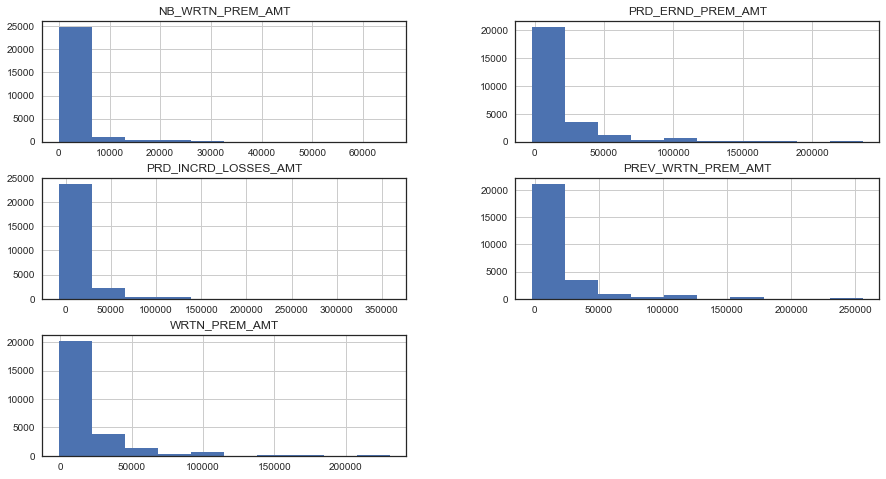

In [275]:
agency_2015_df[[ 'NB_WRTN_PREM_AMT' , 'WRTN_PREM_AMT' , 'PREV_WRTN_PREM_AMT','PRD_ERND_PREM_AMT' ,
                   'PRD_INCRD_LOSSES_AMT']].hist(figsize=(15,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027ECE8FD198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027ECEECAA90>]], dtype=object)

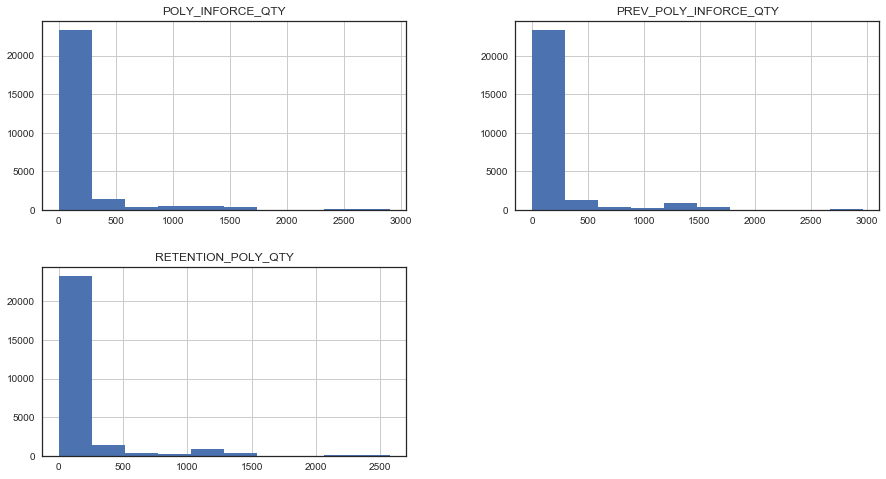

In [276]:
agency_2015_df[[ 'RETENTION_POLY_QTY' , 'POLY_INFORCE_QTY' , 'PREV_POLY_INFORCE_QTY']].hist(figsize=(15,8))

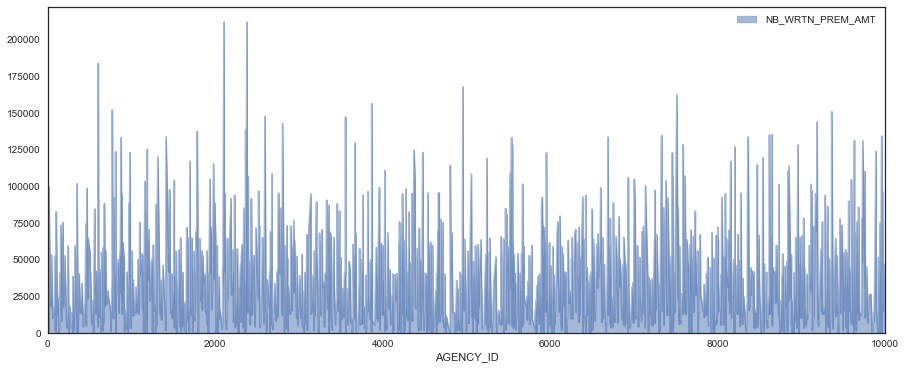

In [277]:
analysis_column = ['NB_WRTN_PREM_AMT' ]
grouped_Year_data = agency_2015_df.groupby(['AGENCY_ID'])
grouped_Year_data[analysis_column].sum().plot.area(figsize=(15,6) , stacked=False)

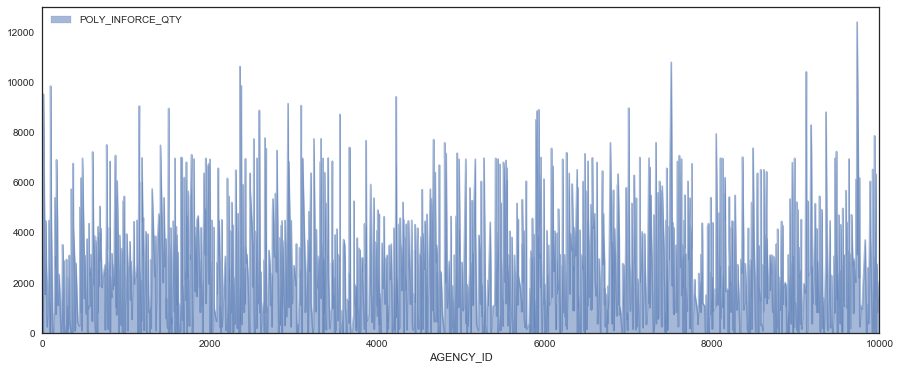

In [278]:
analysis_column = ['POLY_INFORCE_QTY' ]
grouped_Year_data = agency_2015_df.groupby(['AGENCY_ID'])
grouped_Year_data[analysis_column].sum().plot.area(figsize=(15,6) , stacked=False)

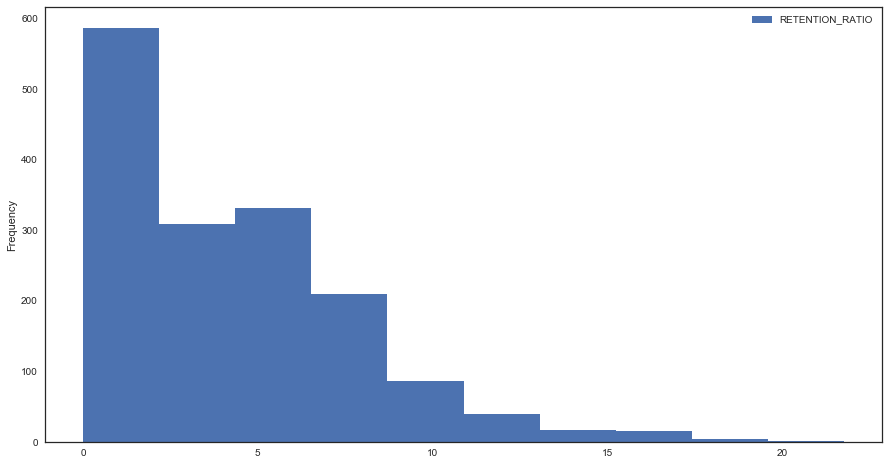

In [259]:
analysis_column = ['RETENTION_RATIO']
grouped_Year_data = agency_2015_df.groupby(['AGENCY_ID'])
grouped_Year_data[analysis_column].sum().plot.hist(figsize=(15,8) , stacked=True)

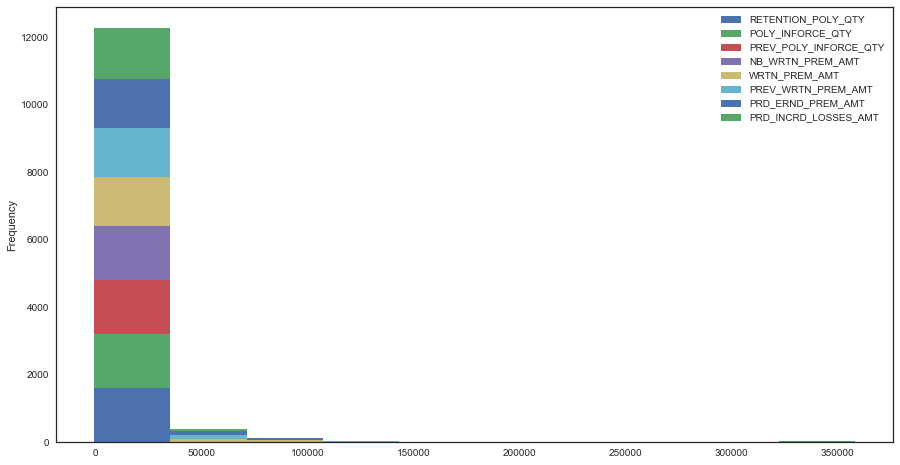

In [257]:
analysis_column =  ['RETENTION_POLY_QTY' , 'POLY_INFORCE_QTY' , 'PREV_POLY_INFORCE_QTY' , 'NB_WRTN_PREM_AMT' , 'WRTN_PREM_AMT' , 'PREV_WRTN_PREM_AMT','PRD_ERND_PREM_AMT' ,
                   'PRD_INCRD_LOSSES_AMT']
grouped_Year_data = agency_2015_df.groupby(['AGENCY_ID'])
grouped_Year_data[analysis_column].mean().plot.hist(figsize=(15,8) , stacked=True)

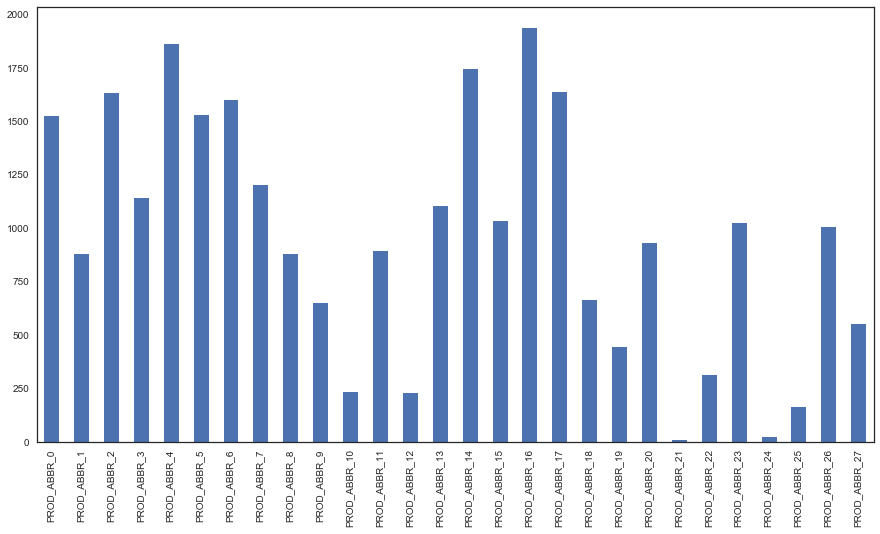

In [280]:
analysis_column =  ['PROD_ABBR_0', 'PROD_ABBR_1', 'PROD_ABBR_2', 'PROD_ABBR_3',
       'PROD_ABBR_4', 'PROD_ABBR_5', 'PROD_ABBR_6', 'PROD_ABBR_7',
       'PROD_ABBR_8', 'PROD_ABBR_9', 'PROD_ABBR_10', 'PROD_ABBR_11',
       'PROD_ABBR_12', 'PROD_ABBR_13', 'PROD_ABBR_14', 'PROD_ABBR_15',
       'PROD_ABBR_16', 'PROD_ABBR_17', 'PROD_ABBR_18', 'PROD_ABBR_19',
       'PROD_ABBR_20', 'PROD_ABBR_21', 'PROD_ABBR_22', 'PROD_ABBR_23',
       'PROD_ABBR_24', 'PROD_ABBR_25', 'PROD_ABBR_26', 'PROD_ABBR_27']
#grouped_Year_data = agency_2015_df.groupby(['AGENCY_ID'])
agency_2015_df[analysis_column].sum().plot.bar(figsize=(15,8) )

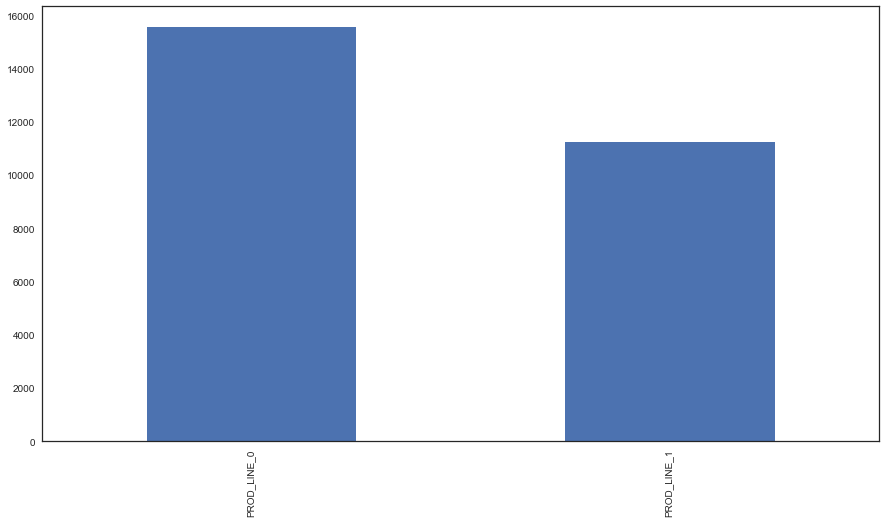

In [281]:
analysis_column =  ['PROD_LINE_0', 'PROD_LINE_1']
#grouped_Year_data = agency_2015_df.groupby(['AGENCY_ID'])
agency_2015_df[analysis_column].sum().plot.bar(figsize=(15,8) )